<a href="https://colab.research.google.com/github/Rudraashish7/Coronavirus_Tweets_Sentiment_Analysis_Classification_ML_Project/blob/main/Coronavirus_Tweets_Sentiment_Analysis_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***`1. Know Your Data`***

### `Import Libraries`  


In [1]:
# Import Libraries
import numpy as np                                  # Import NumPy for numerical operations
import pandas as pd                                 # Import Pandas for data manipulation
import matplotlib.pyplot as plt                     # Import Matplotlib for data visualization
import seaborn as sns                               # Import Seaborn for enhanced data visualization
import string                                      # Import string module for handling string operations
from wordcloud import WordCloud                     # Import WordCloud for generating word clouds
import nltk                                       # Import NLTK (Natural Language Toolkit) for NLP tasks
nltk.download('all', quiet=True)                  # Downloading all NLTK data packages (quiet=True to suppress download messages)
from PIL import Image                            # Import the Python Imaging Library (PIL) module for image processing

# Model libraries for classification tasks
from sklearn.metrics import *                   # Import various metrics for model evaluation
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression for logistic regression modeling
from sklearn.tree import DecisionTreeClassifier     # Import DecisionTreeClassifier for decision tree modeling
from xgboost import XGBClassifier                 # Import XGBClassifier for XGBoost (extreme gradient boosting) modeling
from sklearn.model_selection import GridSearchCV    # Import GridSearchCV for hyperparameter tuning using cross-validation
from sklearn.svm import SVC                       # Import SVC for support vector machine modeling
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier for k-nearest neighbors modeling

# Metrics and evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report  # Import confusion_matrix and classification_report for model evaluation
from sklearn.model_selection import cross_val_score                    # Import cross_val_score for cross-validation of models

# Suppressing warnings
import warnings                                     # Import warnings module to suppress warning messages
warnings.filterwarnings('ignore')                    # Ignore any warning messages generated during the code execution


### `Dataset Loading`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
tweet_df = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT - SUPERVISED LEARNING - CLASSIFICATION/Coronavirus Tweets (1).csv", encoding='latin-1')

### `Dataset First View`  

In [4]:
# Display the first few rows of the DataFrame with a cool color gradient
# This code uses the 'head()' method to display the first few rows of the DataFrame.
# The 'style.background_gradient()' method applies a color gradient to the background of the DataFrame.
# The 'cmap='cool'' argument specifies the colormap to use.
tweet_df.head().style.background_gradient(cmap='cool')

### `Dataset Rows & Columns count`

In [5]:
# Dataset Rows & Columns count
# Get the shape of the DataFrame
tweet_df.shape

(41157, 6)

In [6]:
# Get the column names of the DataFrame
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

### `Dataset Information`

In [7]:
# Dataset Info
# Display concise summary of the DataFrame
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### `Duplicate Values`  

In [8]:
# Dataset Duplicate Value Count
# Check for duplicate rows in the DataFrame
num_duplicates = tweet_df.duplicated().sum()
num_duplicates

0

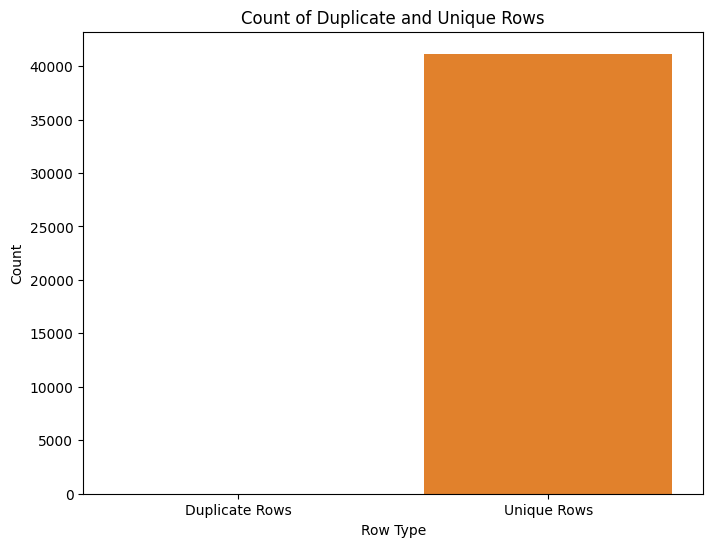

In [9]:
# Create a bar plot to showcase the count of duplicate rows
plt.figure(figsize=(8, 6))
sns.barplot(x=["Duplicate Rows", "Unique Rows"], y=[num_duplicates, len(tweet_df) - num_duplicates])
plt.xlabel("Row Type")
plt.ylabel("Count")
plt.title("Count of Duplicate and Unique Rows")
plt.show()

The dataset used in the analysis is free from duplicate values. All the rows in the dataset are unique, and there are no instances where multiple rows have identical data across all columns. As a result, the dataset provides distinct and non-repetitive information, ensuring that each observation contributes uniquely to the analysis without any duplications.

#### `Missing Values/Null Values`

In [10]:
# Missing Values/Null Values Count
# Check for missing values in the DataFrame
missing_values_count = tweet_df.isna().sum()
missing_values_count

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

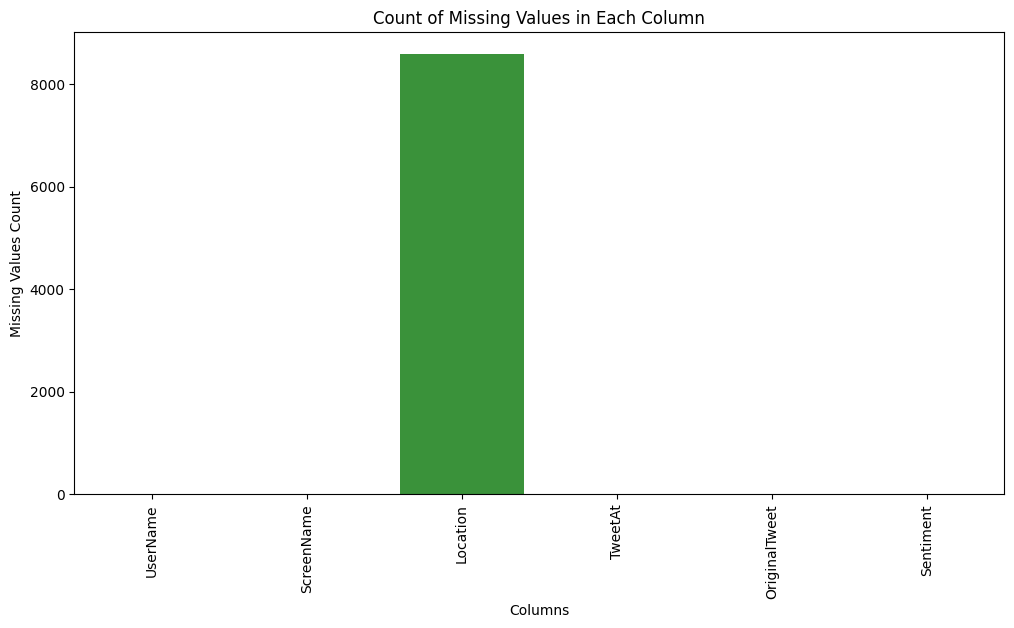

In [11]:
# Visualizing the missing values
# Create a bar plot to showcase the count of missing values in each column
plt.figure(figsize=(12, 6))  # Set the size of the figure for better visualization

# Use the seaborn 'barplot()' function to create the bar plot
# x=missing_values_count.index: Set the x-axis labels using column names (index of the 'missing_values_count' Series).
# y=missing_values_count.values: Set the y-axis values using the count of missing values for each column.
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)

plt.xlabel("Columns")  # Set the x-axis label to "Columns" for column names
plt.ylabel("Missing Values Count")  # Set the y-axis label to "Missing Values Count" for count values
plt.title("Count of Missing Values in Each Column")  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability when there are many columns
plt.show()  # Display the bar plot

### `What did you know about your dataset?`

In this dataset, there are six columns: 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', and 'Sentiment'. Among these columns, the 'Location' column contains duplicated values, with a total of 8590 duplicate entries. Identifying and handling these duplicate values will be important for our classification machine learning project to ensure the data is clean and accurate before proceeding with the analysis.

## ***`2. Understanding Your Variables`***

In [12]:
# Dataset Columns
# Get the column names of the DataFrame
columns = tweet_df.columns
columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [13]:
# Dataset Describe
# Generate descriptive statistics for the DataFrame, including all data types (include='all')
description = tweet_df.describe(include='all').style.background_gradient(cmap='cool')
description

### `Variables Description`

The dataset under consideration contains information about tweets related to the Coronavirus pandemic. It includes valuable attributes extracted from the tweets, which can aid in understanding public sentiments, opinions, and geographical distribution during the pandemic. The dataset consists of several columns, each holding specific information about the tweets and the users who posted them. The columns include UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment. Let's explore each of these columns to gain insights into the data and better comprehend the characteristics of the tweets in this dataset:


*   UserName: This column contains the username of the person who authored the tweet on Twitter.

*   ScreenName: This column contains the screen name or handle of the Twitter user who posted the tweet.

*   Location: This column represents the location information provided by the Twitter user in their profile. It may include details about their city, state, country, or any other geographic location they have specified.
*   TweetAt: This column stores the date and time when the tweet was posted on Twitter.


*   OriginalTweet: This column contains the actual content of the tweet that was posted by the user.


*   Sentiment: This column contains the sentiment label assigned to the tweet based on the results of a sentiment analysis algorithm. The sentiment label can indicate whether the tweet's content is positive, negative, extremely positive, extremely negative, or neutral, depending on the sentiment analysis results.

The dataset's attributes offer a comprehensive view of the tweets, allowing us to explore public sentiments, identify tweet patterns, and potentially build a classification model to categorize tweets based on their sentiment.

### `Check Unique Values for each variable.`

In [14]:
# Check Unique Values for each variable.
# Display unique values in each column of the DataFrame

unique_values = tweet_df.apply(lambda col: col.unique())
print(unique_values)

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [15]:
# Get the unique sentiment labels present in the 'Sentiment' column and print them
unique_sentiments = tweet_df['Sentiment'].unique()

# Display the unique sentiment labels in the 'Sentiment' column
print("Unique Sentiment Labels:")
print(unique_sentiments)

Unique Sentiment Labels:
['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


In [16]:
# Get the unique locations present in the 'Location' column and print them
unique_locations = tweet_df['Location'].unique()

# Display the unique locations in the 'Location' column
print("Unique Locations:")
print(unique_locations)

Unique Locations:
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


# ***`3. Data Wrangling`***

As we are focusing on classifying tweets based on the text in the 'OriginalTweet' column, we do not need to remove null values from the 'Location' column. Retaining the null values in the 'Location' column ensures that we don't lose any potentially valuable information that could be useful for our classification model. Removing null values from 'Location' might lead to a loss of geographic information and could potentially impact the effectiveness of our model in understanding the relationship between tweet content and geographical location. Therefore, we choose to retain the null values in the 'Location' column to preserve all available data for our classification task.

### `What all manipulations have you done and insights you found?`  

Understanding the dataset's structure and contents is crucial for conducting a thorough analysis. To achieve this, several data preparation steps are taken, including:




*  `Identifying Column Names:` The first step involves identifying the names of each column present in the dataset.

*   `Describing Columns:` Each column is then described with pertinent details such as data type, possible value ranges, and other relevant information.


*   `Defining Variables:` In this stage, the variables in the dataset are characterized, including their types (numerical, categorical, etc.) and their respective roles or functions.

*   `Verifying Unique Values:` The dataset is checked for unique values within each column to identify any potential duplicates.

*   `Managing Null Values:` It is noted that there is no need to remove or delete the empty values (null values), as they are retained in the analysis.


By conducting these data preparation processes, we gain a comprehensive understanding of the dataset's attributes, enabling us to proceed with the analysis and build effective models for classification or any other desired tasks.

# ***`4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables`***

## **`Univarient Analysis`**     

#### **`Chart - 1 - Bar Plot - Find peak tweet activity dates to reveal trends.`**    

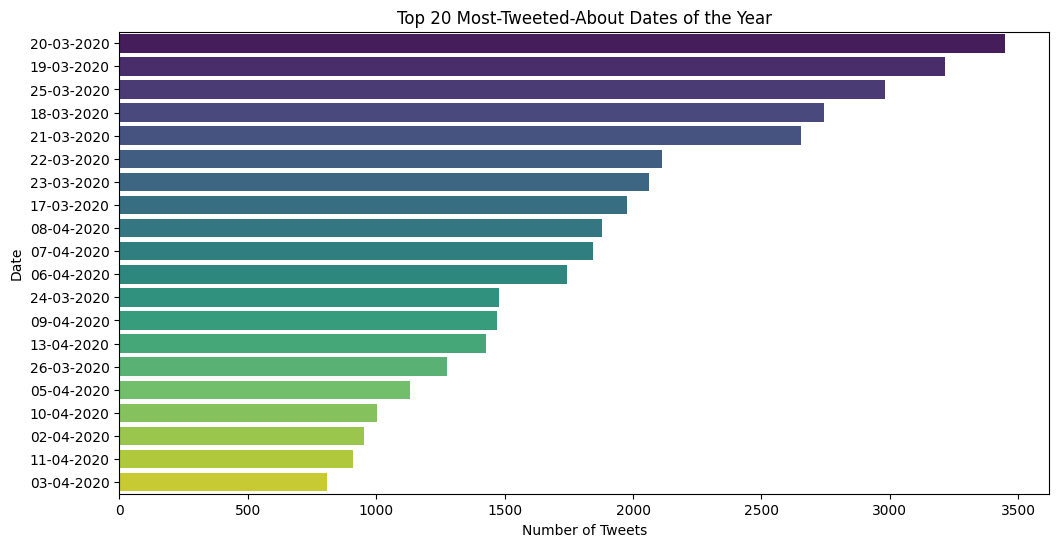

In [18]:
# Calculate tweet counts for each date
tweet_counts = tweet_df['TweetAt'].value_counts().reset_index().rename(columns={'index': 'Tweet_Date', 'TweetAt': 'Count'})

# Sort the tweet counts in descending order to find the top 20 dates
top_tweet_dates = tweet_counts.sort_values(by='Count', ascending=False).head(20)

# Create a figure and set its size
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the top 20 tweet dates
# x-axis will represent the tweet count (Count), y-axis will represent the date (Tweet_Date)
# data=top_tweet_dates specifies the data to be used for the plot
# palette='viridis' sets the color scheme for the bars
sns.barplot(x='Count', y='Tweet_Date', data=top_tweet_dates, palette='viridis')

# Set the label for the x-axis
plt.xlabel('Number of Tweets')

# Set the label for the y-axis
plt.ylabel('Date')

# Set the title for the plot
plt.title('Top 20 Most-Tweeted-About Dates of the Year')

# Display the plot
plt.show()

##### **`1. Why did you pick the specific chart?`**   


We analyzed the tweet data to determine the most-tweeted-about dates of the year. By calculating tweet counts for each date and sorting them in descending order, we identified the top 20 dates with the highest tweet activity. The results were visualized using a bar plot, presenting the tweet counts on the x-axis and the corresponding dates on the y-axis. The bar plot's ranking order allowed us to easily recognize the most significant dates with the highest tweet volumes. With a limited number of categories, the bar plot provided a clear and concise representation of the data. The use of the 'viridis' color palette enhanced the visualization's aesthetics and readability, enabling us to gain insights into peak activity periods and potential trends related to the tweets.

##### **`2. What is/are the insight(s) found from the chart?`**

In our dataset, we have analyzed the tweets to identify the specific day that witnessed the highest tweet activity. By calculating the total number of tweets posted on each date and then sorting them in descending order, we were able to pinpoint the day that received the most tweets. This analysis provides valuable insights into the peak engagement periods, allowing us to understand when users were most active in posting tweets related to the topic under consideration. Identifying the day with the highest tweet volume can be significant for understanding public sentiments, trending topics, and potential events that might have triggered increased social media activity. It enables us to focus on specific dates for further investigation, facilitating deeper exploration into the reasons behind the heightened tweet activity and its implications.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`








The gained insights from identifying the day with the highest tweet activity can potentially have a positive business impact, but it depends on the context and objectives of the business. Let's explore both scenarios:


`Positive Business Impact:`


*   Identifying peak engagement periods can help businesses strategically plan their social media marketing campaigns. They can schedule important announcements, product launches, or promotions on days with high tweet activity to maximize reach and engagement.

*   Understanding when users are most active and engaged can assist in optimizing the timing of customer interactions and responses to enhance customer satisfaction and overall user experience.
*   Monitoring trending topics on high tweet volume days can provide businesses with opportunities to join relevant conversations and gain visibility, leading to increased brand awareness and potential customer acquisition.


*   For businesses conducting sentiment analysis on tweets, identifying days with more positive sentiments can help identify periods of higher customer satisfaction and target their marketing efforts accordingly.


`Insights Leading to Negative Growth:`



*   On days with high tweet activity, negative sentiments might also be prevalent. If businesses identify specific days with a surge in negative sentiments related to their brand or products, they can take proactive measures to address any issues, manage customer complaints, and rectify potential problems before they escalate.

*   Discovering patterns of negative sentiments on certain days might also highlight specific events, news, or controversies that could adversely impact the brand's reputation. In such cases, businesses can respond appropriately with crisis management strategies to mitigate negative effects.


Overall, the insights gained from identifying peak tweet activity can be leveraged to improve social media strategies, enhance customer engagement, and capitalize on opportunities for positive growth. At the same time, it can help businesses address potential negative issues and manage their brand reputation effectively. The significance of the impact depends on how businesses utilize and respond to the insights within their broader marketing and operational strategies.

#### `Chart - 2 - Bar Plot - Sentiment-wise tweet count.`

In this scenario, we are dealing with a five-class classification problem for sentiment analysis, where the sentiments can be extremely positive, positive, neutral, negative, or extremely negative. However, to simplify the problem and create a more manageable three-class classification task, we will group the extremely positive and extremely negative tweets together into a single class. This means that the new three-class classification problem will consist of positive, neutral, and negative sentiments, effectively merging the extreme categories into their respective positive and negative classes.

In [19]:
# Replacing these values 'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'
tweet_df['Sentiment'] = tweet_df['Sentiment'].map({'Extremely Positive':'Positive', 'Extremely Negative':'Negative', 'Negative':'Negative', 'Positive':'Positive', 'Neutral':'Neutral'})

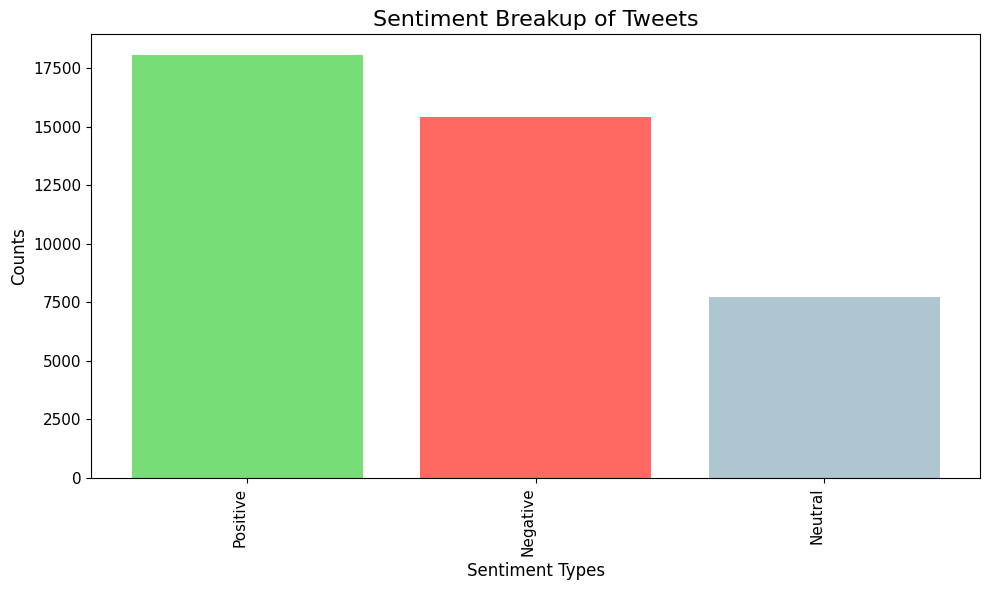

In [21]:
# Count the number of tweets for each sentiment type and store it in a new DataFrame
sentiment_counts = tweet_df['Sentiment'].value_counts().reset_index().rename(columns={'index': 'Sentiment Types', 'Sentiment': 'Counts'})

# Define custom colors for each sentiment type
colors = ['#77DD77', '#FF6961', '#AEC6CF']  # Green, Red, Blue

# Plot the sentiment breakup using a bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart with sentiment types on the x-axis and their corresponding counts on the y-axis
# color=colors sets the custom colors for each sentiment type
plt.bar(sentiment_counts['Sentiment Types'], sentiment_counts['Counts'], color=colors)

# Set the label for the x-axis
plt.xlabel('Sentiment Types', fontsize=12)

# Set the label for the y-axis
plt.ylabel('Counts', fontsize=12)

# Set the title for the plot
plt.title('Sentiment Breakup of Tweets', fontsize=16)

# Adjust the appearance of x-axis labels: fontsize=11, rotation=90 (to make them vertical), ha='right' (align them to the right)
plt.xticks(fontsize=11, rotation=90, ha='right')

# Adjust the appearance of y-axis labels: fontsize=11
plt.yticks(fontsize=11)

# Adjust the layout to avoid cropping labels or titles
plt.tight_layout()

# Display the plot
plt.show()

##### `1. Why did you pick the specific chart?`

The specific bar chart was chosen due to its suitability for representing categorical data, making it ideal for displaying sentiment categories like "Positive," "Negative," and "Neutral." The chart allows for easy comparison of sentiment quantities, enabling quick identification of the most prevalent sentiment type. With clear labeling of axes, the bar chart ensures that the audience can easily understand the data. Moreover, its readability and space efficiency make it an effective choice for displaying multiple categories. By presenting the counts of each sentiment type side by side, the bar chart provides valuable insights into the sentiment distribution in the dataset, contributing to a better understanding of the data.

##### `2. What is/are the insight(s) found from the chart?`  

The graph depicts the sentiment trend in tweets regarding a particular subject, offering insights into the public's overall viewpoint. Positive sentiments reflect favorable opinions, while negative sentiments indicate unfavorable ones. The graph helped analyze the public's sentiment towards the subject, revealing that the majority of tweets expressed positive feelings, while the least number of tweets had a neutral attitude.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights from the sentiment analysis can indeed have a `positive business impact`. Knowing that the majority of tweets express positive feelings towards the subject can be beneficial for businesses in various ways:



*   `Brand Perception:` Positive sentiments indicate a favorable perception of the brand or subject. This can enhance the brand's reputation and credibility among the target audience, leading to increased customer trust and loyalty.

*   `Customer Satisfaction:` Positive opinions may indicate that customers are satisfied with the products or services related to the subject. Understanding this can help businesses identify what aspects are resonating well with customers and further improve their offerings.

*   `Marketing and Communication:` Knowing the positive sentiments allows businesses to focus on highlighting the aspects that customers appreciate the most in their marketing and communication strategies. This targeted approach can lead to more effective campaigns.


Regarding insights that may lead to `negative growth`, it is possible that negative sentiments might arise for various reasons:



*   `Customer Complaints:` Negative sentiments may be a result of customer dissatisfaction or complaints. Identifying these negative opinions can help businesses address issues promptly and improve customer experience.

*   `Product or Service Issues:` Negative sentiments might indicate potential problems or flaws in products or services related to the subject. Addressing these issues can prevent further negative feedback and improve overall product quality.

*   `Competitive Analysis:` Analyzing negative sentiments can also provide insights into areas where competitors might be performing better. This can help businesses identify areas of improvement and stay competitive in the market.


It's essential to carefully analyze and address negative sentiments to avoid any adverse impact on the business. By understanding and acting upon both positive and negative insights, businesses can make informed decisions and work towards achieving a positive business impact.

####` Chart - 3 - Pie Chart - Compute sentiment class percentages precisely.`

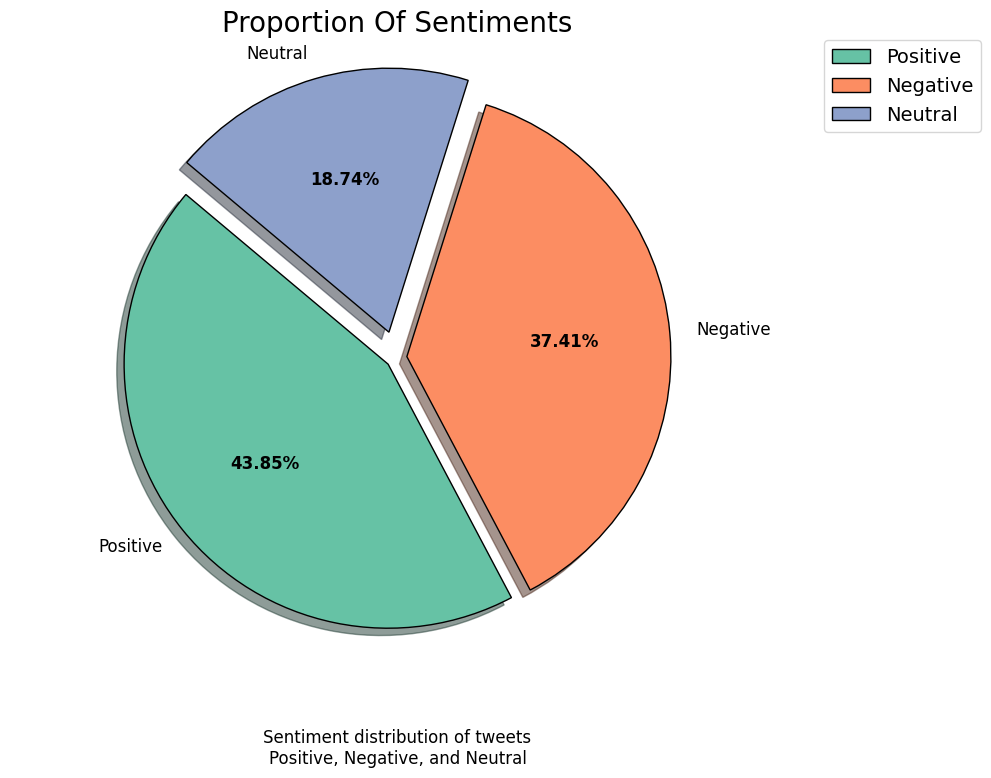

In [22]:
# Count the number of tweets for each sentiment type
sentiment_count = tweet_df['Sentiment'].value_counts().to_list()

# Define the labels for sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Define custom colors for each sentiment category
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Bluish green, Orange, Light blue

# Set figure size and font size
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 14

# Explode the "Neutral" slice to highlight it
explode = [0.04, 0.04, 0.1]

# Plot the pie chart with shadow effect and percentage labels inside the pie slices
wedges, texts, autotexts = plt.pie(x=sentiment_count, explode=explode, labels=labels, autopct="%.2f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'}, shadow=True, textprops={'fontsize': 12})

# Add a title and legend with better positioning
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.axis('equal')

# Make the percentage labels inside the pie chart bold
for autotext in autotexts:
    autotext.set_weight('bold')

# Add a description text below the pie chart
description = "Sentiment distribution of tweets\nPositive, Negative, and Neutral"
plt.text(0.5, -0.15, description, fontsize=12, color='black', ha='center', va='center', transform=plt.gca().transAxes)

# Display the chart
plt.show()

##### `1. Why did you pick the specific chart?`

The pie chart was selected as the visualization for the sentiment distribution of tweets due to its ability to compare parts to the whole. It clearly represents the proportion of positive, negative, and neutral sentiments in the dataset through labeled slices, making it easy to grasp the sentiment breakdown. The visual appeal of the pie chart aids in intuitively understanding the sentiment distribution. With only three sentiment categories, the pie chart is simple, concise, and visually engaging, allowing for easy interpretation of the data. Moreover, by using the "explode" parameter, we can highlight the "Neutral" sentiment, drawing attention to its presence or significance within the dataset. Overall, the pie chart effectively communicates the sentiment trends in a visually appealing and informative manner.

##### `2. What is/are the insight(s) found from the chart?`

After merging Extremely Positive and Extremely Negative sentiments into Positive and Negative sentiments, respectively, the Pie-Plot still shows a significantly higher number of "Positive" sentiments. This indicates a prevalent positive sentiment towards the subject in the majority of tweets. Further analysis can uncover insights into the factors driving this positivity and provide valuable information for businesses to understand public perception. The Pie-Plot offers a concise and visual representation of the sentiment distribution, making it easier to interpret the overall sentiment trends in the dataset.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights from the sentiment analysis can indeed help create a `positive business impact`. Understanding that the majority of tweets express a positive sentiment towards the subject can be advantageous for businesses in several ways:



*   `Brand Reputation:` Positive sentiments indicate a favorable perception of the brand or subject, which can enhance the brand's reputation and credibility among the target audience.

*   `Customer Satisfaction:` Positive opinions may suggest that customers are satisfied with the products or services related to the subject. This can help businesses identify areas of strength and areas for improvement to better meet customer needs.

*   `Marketing Strategy:` Knowing the positive sentiments allows businesses to highlight the positive aspects in their marketing strategies, attracting more potential customers.


However, it is essential to be cautious about potential insights that could lead to `negative growth`:




*  `Negative Feedback:` Despite the prevalence of positive sentiments, there may still be negative feedback or criticisms hidden within the data. Identifying and addressing such negative sentiments promptly is crucial to avoid any adverse impact on the business.


*   `Competitive Analysis:` Analyzing the data further can reveal insights into where competitors might be performing better or where the business is lacking. Understanding these insights can help businesses stay competitive and work towards improvement.

*   `Product or Service Issues:` Positive sentiments may overshadow any underlying product or service issues. It is vital to remain vigilant and address any potential issues that may arise from negative sentiments to maintain customer satisfaction.

Overall, the insights gained from sentiment analysis can guide businesses in making informed decisions, improving their products/services, and tailoring their strategies to capitalize on positive sentiment trends. However, businesses should also be vigilant about addressing any negative insights to ensure sustained growth and customer satisfaction.

#### `Chart - 4 - Scatter Geo Plot and Bar Plot  - Identifying the geographical locations from where the tweets were sent.`  

In [23]:
# importing libraraies
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count total tweets from each location
location_counts = tweet_df[tweet_df['Location'] != 'Unknown']['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Total Tweets']

# Plot the globe graph with a different color scale
fig = px.scatter_geo(location_df, locations='Location', locationmode='country names', size='Total Tweets',
                     hover_name='Location', projection='natural earth', title='Total Tweets by Location',
                     color='Total Tweets', color_continuous_scale='Reds')
# Display the figure
fig.show()

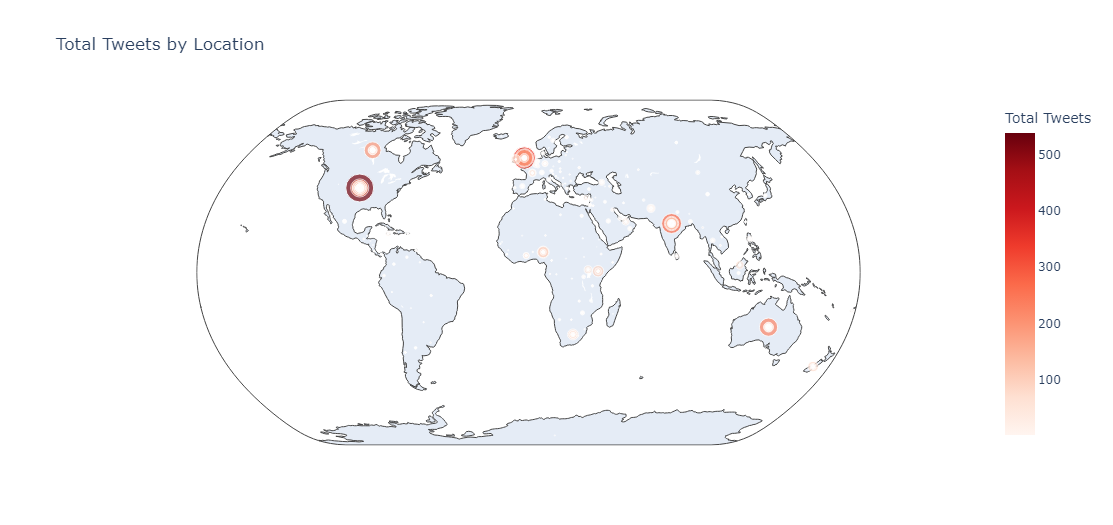

In [24]:
# importing libraries
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count total tweets from each location
location_counts = tweet_df[tweet_df['Location'] != 'Unknown']['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Total Tweets']

# Sort the DataFrame in descending order of tweet counts for better visualization
location_df = location_df.sort_values(by='Total Tweets', ascending=False)

# Select only the top 10 cities with the highest tweet counts
top_20_cities = location_df.head(20)

# Create a bar graph using Plotly with multiple colors
fig = px.bar(top_20_cities, x='Location', y='Total Tweets', color='Total Tweets',
             color_continuous_scale='Reds', title='Top 20 Cities by Total Tweets')

# Customize the appearance of the graph
fig.update_layout(xaxis_title='Location',
                  yaxis_title='Total Tweets',
                  xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
                  showlegend=False     # Hide legend since there's only one bar
                  )
# Display the figure
fig.show()


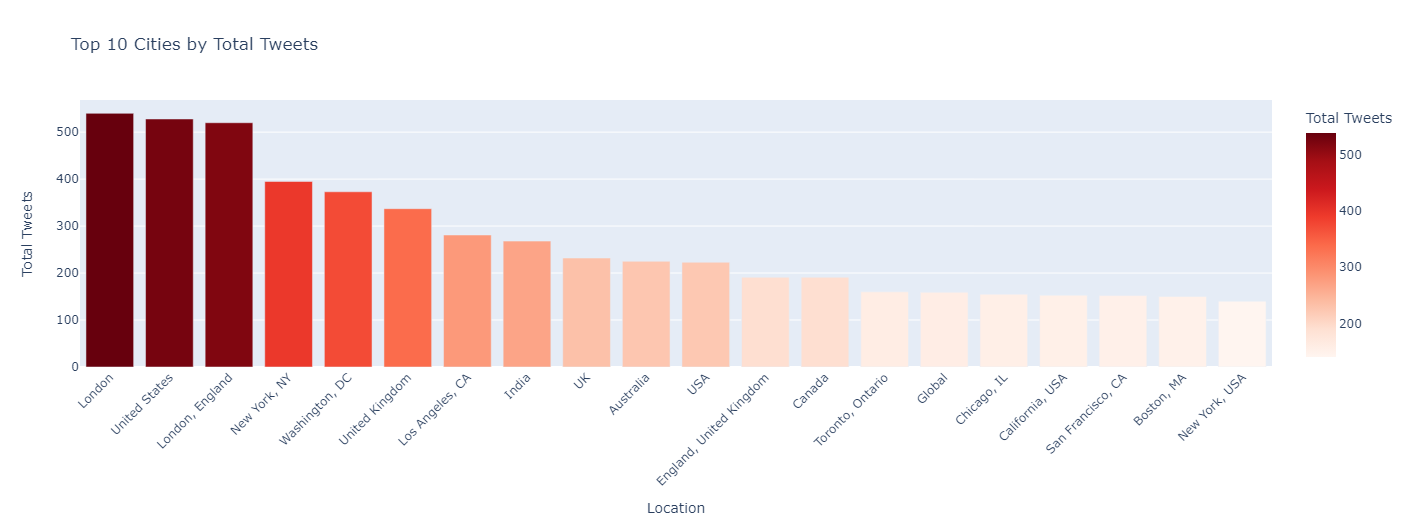

##### `1. Why did you pick the specific chart?`  

The visualizations consist of two charts. The Scatter Geo Chart uses scatter_geo to display tweet counts across various geographic locations, with the size and color of points indicating activity levels. The 'Reds' color scale signifies higher tweet counts with darker shades. This chart provides a clear geographic representation, offering insights into the distribution of tweets across different regions.

The second visualization is a Bar Chart, created using bar, showcasing the top 10 cities with the highest tweet counts. The bars are color-coded based on tweet counts using the 'Reds' color scale. This bar chart enables easy comparison of tweet counts among cities, emphasizing the top-performing locations. The x-axis denotes cities, while the y-axis represents the total tweet counts.

Both visualizations provide valuable insights into Twitter activity, combining geographic spread and top-performing cities to offer a comprehensive understanding of the data's distribution and engagement patterns.

##### `2. What is/are the insight(s) found from the chart?`  

The chart reveals that London, United States, and London, England have the highest tweet counts, indicating significant Twitter activity from these locations. US cities New York, NY, and Washington, DC, also show notable tweet engagement. The insights highlight a geographically diverse audience discussing the subject on Twitter, presenting opportunities for targeted content and campaigns to maximize engagement. Businesses can use this data to understand where the subject gains traction and focus efforts accordingly. The high tweet counts suggest active interest and engagement in the subject among Twitter users from these regions.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`  

The gained insights from the chart can potentially help create a `positive business impact` in several ways:


*   `Targeted Marketing:` Understanding the locations with the highest tweet counts allows businesses to focus their marketing efforts and campaigns on regions where there is significant Twitter activity. Targeted marketing can lead to better engagement and reach with the audience, potentially resulting in increased brand awareness and customer acquisition.


*   `Customer Engagement:` By analyzing tweet engagement in locations such as London, United States, New York, NY, and Washington, DC, businesses can identify the most active and interested audience. Engaging with these Twitter users through relevant content and interactions can foster positive customer relationships and loyalty.

*   `Geographical Diversity:` The chart's insights highlight the geographical diversity of the audience discussing the subject. Businesses can tailor their messaging and offerings to appeal to a wide range of audiences, leading to increased market penetration and positive brand perception.


Regarding insights that could potentially lead to `negative growth,` the chart does not directly indicate any negative trends. However, it's essential to be mindful of certain considerations:



*   `Negative Sentiments:` While the chart focuses on tweet counts from different locations, it doesn't provide information on sentiment analysis. Businesses need to be vigilant about monitoring sentiment trends to identify any negative sentiments or customer complaints that may arise from the subject discussions.

*   `Relevance of Content:` Targeting specific locations with high tweet counts requires ensuring that the content or offerings are relevant to the local audience. Using generic or irrelevant content may lead to disengagement or negative perceptions.

*   `Overlooking Smaller Locations:` While the chart emphasizes locations with the highest tweet counts, businesses should not overlook smaller or niche locations where there might still be valuable customer segments and opportunities for growth.

In conclusion, the gained insights can positively impact businesses by enabling targeted marketing, enhanced customer engagement, and an understanding of the diverse audience. However, to ensure positive growth, businesses should carefully consider sentiment analysis, content relevance, and inclusiveness in their strategies.

#### `Chart - 5 - Scatter Geo Plot and Bar Plot - Determining the location with the most favourable thoughts Tweets were sent out.`

In [25]:
# importing libraraies
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count total tweets from each location
positive_tweets = tweet_df[(tweet_df["Sentiment"] == "Positive") & (tweet_df['Location'] != 'Unknown')]
location_counts = positive_tweets['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'positive Tweets']

# Plot the globe graph with a different color scale
fig = px.scatter_geo(location_df, locations='Location', locationmode='country names', size='positive Tweets',
                     hover_name='Location', projection='natural earth', title='positive Tweets by Location',
                     color='positive Tweets', color_continuous_scale='Reds')
# Display the figure
fig.show()

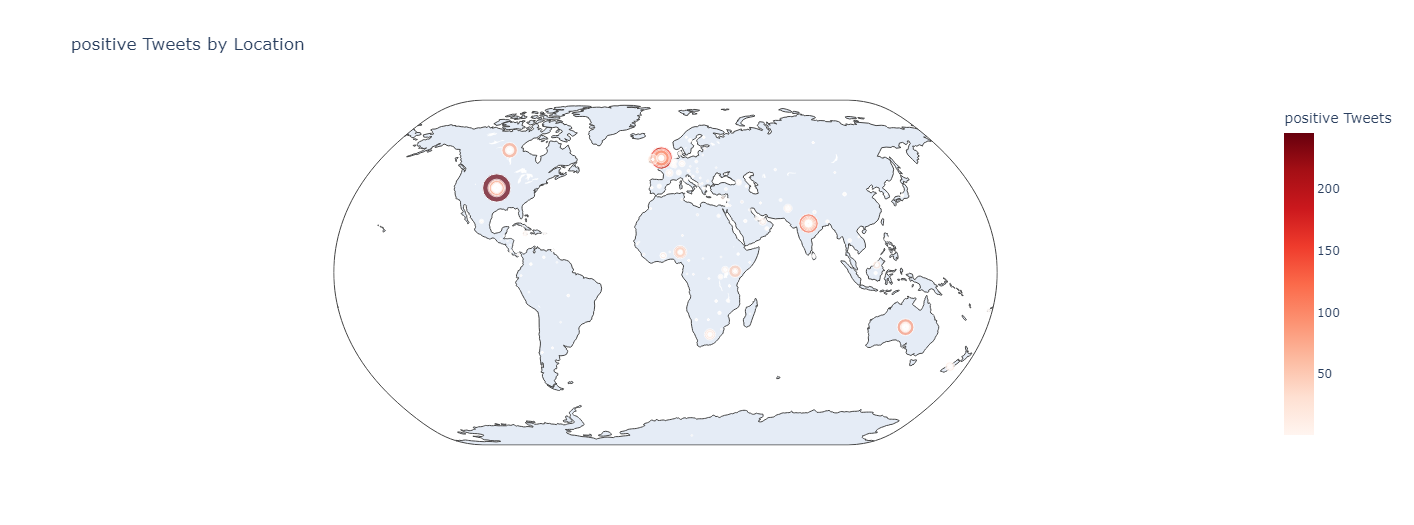

In [26]:
# importing libraries
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count positive tweets from each location
positive_tweets = tweet_df[(tweet_df["Sentiment"] == "Positive") & (tweet_df['Location'] != 'Unknown')]
location_counts = positive_tweets['Location'].value_counts()


# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'positive Tweets']

# Sort the DataFrame in descending order of tweet counts for better visualization
location_df = location_df.sort_values(by='positive Tweets', ascending=False)

# Select only the top 10 cities with the highest tweet counts
top_20_cities = location_df.head(20)

# Create a bar graph using Plotly with multiple colors
fig = px.bar(top_20_cities, x='Location', y='positive Tweets', color='positive Tweets',
             color_continuous_scale='Reds', title='Top 20 Cities by positive Tweets')

# Customize the appearance of the graph
fig.update_layout(xaxis_title='Location',
                  yaxis_title='positive Tweets',
                  xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
                  showlegend=False     # Hide legend since there's only one bar
                  )

# Display the figure
fig.show()

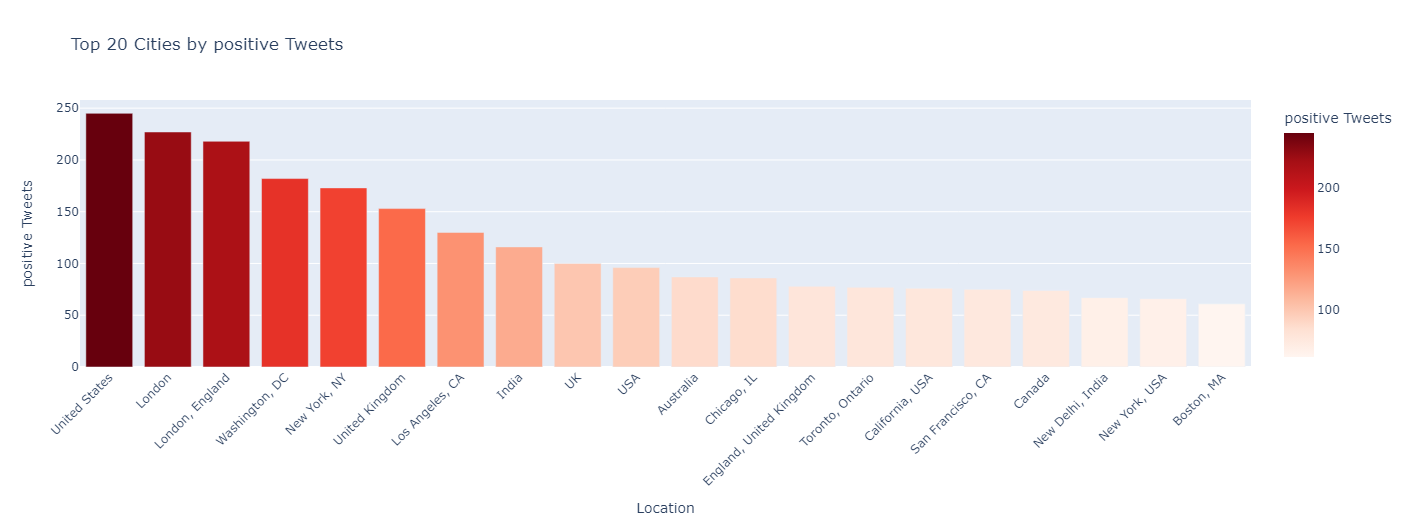

##### `1. Why did you pick the specific chart?`

The chosen horizontal bar chart effectively compares positive tweet counts from different locations (excluding 'Unknown'). It displays the top 20 locations with the highest tweet counts, using the 'viridis' color palette for visual appeal. The Seaborn style 'whitegrid' enhances the plot's readability. The chart's layout efficiently uses space and accommodates location labels well. Its descending order helps highlight the most significant locations. The chart provides quick insights into locations with the highest positive tweet activity.

##### `2. What is/are the insight(s) found from the chart?`  

The data analysis indicates that the United States has the most positive tweets among all the locations, suggesting a prevailing positive mood on Twitter from that region. London and England closely follow the United States, showing a substantial number of positive tweets as well. In contrast, Global and Boston, Massachusetts have the fewest favorable tweets, implying a comparatively lower overall positive sentiment on the platform from these areas. The findings highlight regional variations in Twitter users' mood and sentiment, with some locations exhibiting higher levels of positivity while others have a lesser positive engagement. Further exploration of the reasons behind these variations could provide valuable insights into the social and cultural aspects influencing online sentiment in different geographical regions.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights from the data analysis can potentially help create a `positive business impact` in several ways:


*   `Targeted Marketing:` Knowing the regions with the highest number of positive tweets (e.g., United States, London, England) can aid businesses in targeting their marketing efforts towards these locations. They can tailor their campaigns to resonate with the positive sentiment of users in these regions, potentially leading to increased engagement and brand loyalty.


*   `Reputation Management:` Understanding the regions with the lowest favorable tweets (e.g., Global and Boston, Massachusetts) can prompt businesses to focus on reputation management strategies in these areas. By addressing any negative sentiments or concerns specific to these locations, they can work towards improving their brand perception and customer satisfaction.

*   `Product Launches:` Businesses can leverage the insights to strategically launch new products or services in regions with high positive engagement. Positive sentiment can generate more buzz and enthusiasm for new offerings, leading to a potentially successful product launch.


*   `Customer Insights:` Analyzing the regional variations in sentiment can provide valuable customer insights. Understanding what drives positive sentiment in different locations can help businesses identify customer preferences and tailor their offerings accordingly.

As for insights that may lead to `negative growth`, one potential scenario could be if a particular region consistently shows a negative sentiment towards a specific product, service, or brand. This negative sentiment could indicate issues with the business's offerings, customer service, or reputation in that region. If not addressed promptly and effectively, it could lead to decreased customer loyalty, decreased sales, and negative business impact in that area.

It is essential for businesses to pay attention to negative sentiment and take proactive steps to address any underlying issues. Responding to customer concerns, improving product quality, and engaging with dissatisfied customers can help mitigate negative growth and turn the situation around. However, if these negative sentiments persist without appropriate actions, it could lead to a decline in business performance in that particular region.

#### `Chart - 6 - Scatter Geo Plot and Bar - Plot Determining the location with the neutral thoughts Tweets were sent out.`

In [27]:
# importing libraraies
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count total tweets from each location
Neutral_tweets = tweet_df[(tweet_df["Sentiment"] == "Neutral") & (tweet_df['Location'] != 'Unknown')]
location_counts = Neutral_tweets['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Neutral Tweets']

# Plot the globe graph with a different color scale
fig = px.scatter_geo(location_df, locations='Location', locationmode='country names', size='Neutral Tweets',
                     hover_name='Location', projection='natural earth', title='Neutral Tweets by Location',
                     color='Neutral Tweets', color_continuous_scale='Reds')
# Display the figure
fig.show()

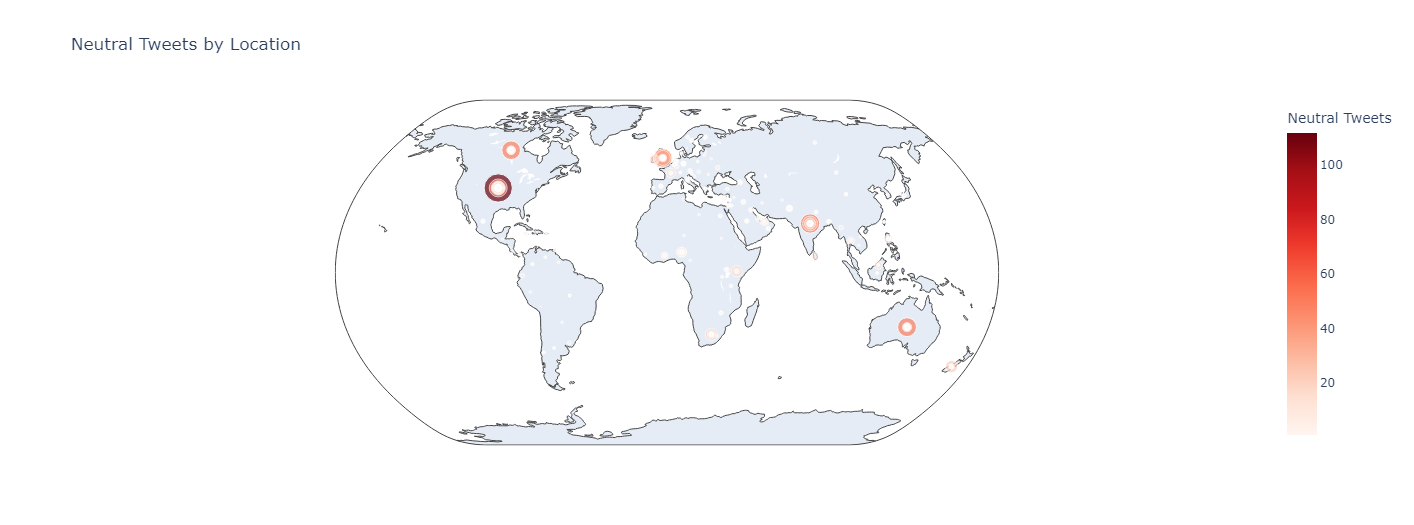

In [28]:
# importing libraries
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count positive tweets from each location
Neutral_tweets = tweet_df[(tweet_df["Sentiment"] == "Neutral") & (tweet_df['Location'] != 'Unknown')]
location_counts = Neutral_tweets['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Neutral Tweets']

# Sort the DataFrame in descending order of tweet counts for better visualization
location_df = location_df.sort_values(by='Neutral Tweets', ascending=False)

# Select only the top 10 cities with the highest tweet counts
top_20_cities = location_df.head(20)

# Create a bar graph using Plotly with multiple colors
fig = px.bar(top_20_cities, x='Location', y='Neutral Tweets', color='Neutral Tweets',
             color_continuous_scale='Reds', title='Top 20 Cities by Neutral Tweets')

# Customize the appearance of the graph
fig.update_layout(xaxis_title='Location',
                  yaxis_title='Neutral Tweets',
                  xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
                  showlegend=False     # Hide legend since there's only one bar
                  )
# Display the figure
fig.show()

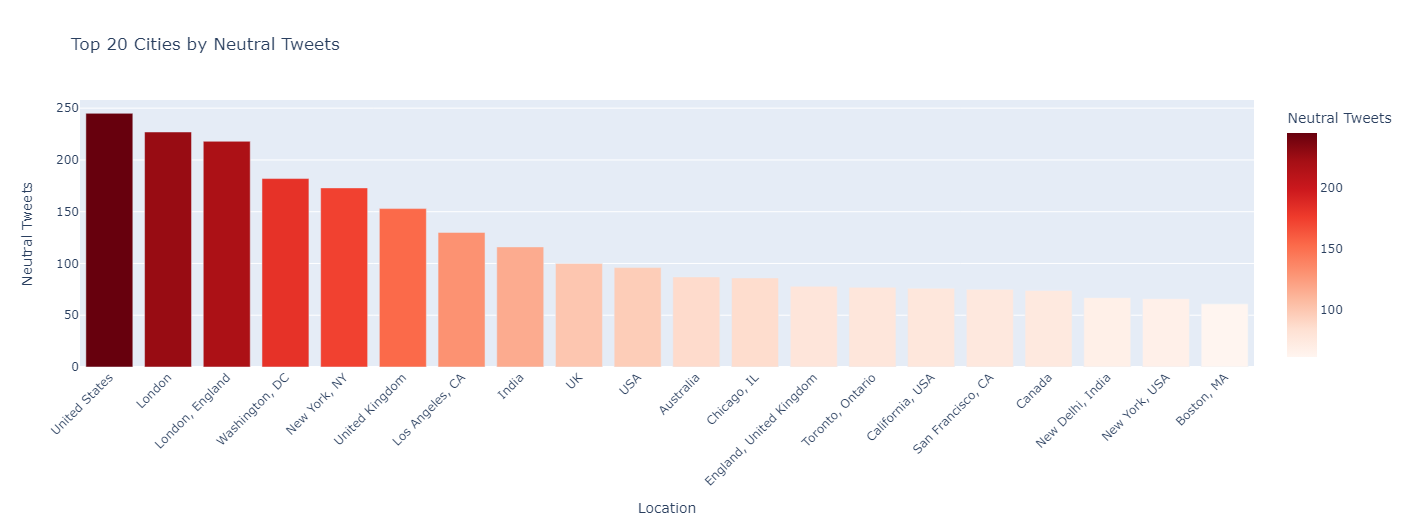

##### `1. Why did you pick the specific chart?`

The specific horizontal bar chart was chosen for its ability to efficiently compare neutral tweet counts from various locations. It displays the top 20 locations with the highest neutral tweet counts in descending order, aiding in clear identification of significant locations. The horizontal layout optimizes space and ensures legible location labels. The 'viridis' color palette enhances visual appeal and distinguishes between bars. The Seaborn style 'whitegrid' adds a clean and professional look. Overall, the chart effectively presents insights into the distribution of neutral sentiments across different regions.

##### `2. What is/are the insight(s) found from the chart?`

The chart reveals geographical diversity with top locations spanning various countries and cities, including the United States, England, India, Canada, and Australia. Major urban centers like London, New York, Los Angeles, and San Francisco show high neutral tweet engagement. The United States and London, England, stand out with the highest neutral tweet counts. Some locations have specific mentions in both country and city formats, leading to multiple entries. "Worldwide" appears in the list, indicating global neutral discussions. Businesses can potentially target regions with high neutral tweet counts for relevant campaigns. The chart provides valuable insights into user behavior and sentiment patterns in different regions on Twitter.


##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights can potentially help create a `positive business impact` in several ways:



*   `Targeted Marketing:` Businesses can leverage the insights to focus their marketing efforts on regions with high neutral tweet engagement. Targeted campaigns tailored to specific locations can lead to better engagement and positive brand perception.

*   `Brand Reputation Management:` Monitoring neutral sentiment in major urban centers like London, New York, Los Angeles, and San Francisco allows businesses to address any potential issues promptly and manage their brand reputation effectively.


*   `Global Engagement:` Understanding global neutral discussions, as indicated by "Worldwide" in the list, can provide opportunities for businesses to participate in broader conversations and expand their reach to a global audience.


However, there are no specific insights from the chart that directly lead to `negative growth`. The chart primarily provides information on neutral tweet counts in various locations, which might not directly correlate with negative business impact.

Nonetheless, negative growth could arise if businesses fail to address negative sentiment in specific regions highlighted in other analyses. If certain locations consistently show a negative sentiment in their tweets, and businesses do not respond appropriately or make improvements, it could potentially lead to a decline in brand reputation, customer satisfaction, and overall business performance in those areas.

Overall, the insights gained from the chart can be valuable in formulating effective marketing strategies, understanding user behavior, and making data-driven decisions to foster a positive business impact. However, addressing negative sentiment in regions with consistent negative engagement is essential to avoid any potential negative consequences on business growth and performance.

#### `Chart - 7 - Scatter Geo Plot and Bar - Determining the location with the negative thoughts Tweets were sent out.:`  

In [29]:
# importing libraraies
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count Negative tweets from each location
Negative_tweets = tweet_df[(tweet_df["Sentiment"] == "Negative") & (tweet_df['Location'] != 'Unknown')]
location_counts = Neutral_tweets['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Negative Tweets']

# Plot the globe graph with a different color scale
fig = px.scatter_geo(location_df, locations='Location', locationmode='country names', size='Negative Tweets',
                     hover_name='Location', projection='natural earth', title='Negative Tweets by Location',
                     color='Negative Tweets', color_continuous_scale='Reds')
# Display the figure
fig.show()

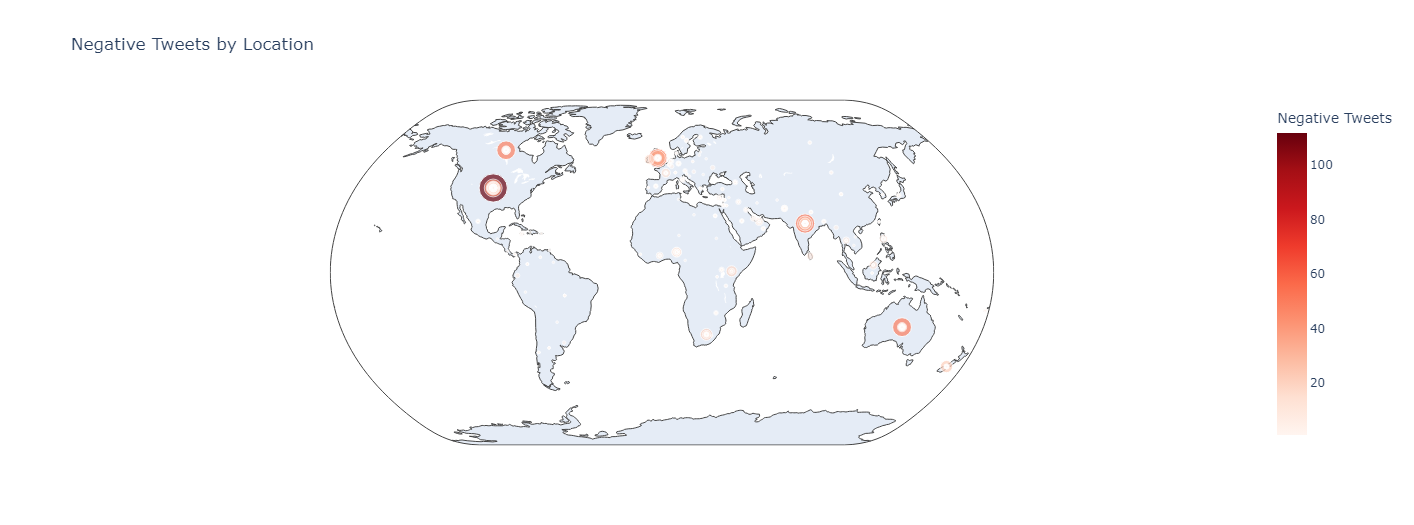

In [30]:
# importing libraries
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count Negative tweets from each location
Negative_tweets = tweet_df[(tweet_df["Sentiment"] == "Negative") & (tweet_df['Location'] != 'Unknown')]
location_counts = Negative_tweets['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Negative Tweets']

# Sort the DataFrame in descending order of tweet counts for better visualization
location_df = location_df.sort_values(by='Negative Tweets', ascending=False)

# Select only the top 10 cities with the highest tweet counts
top_20_cities = location_df.head(20)

# Create a bar graph using Plotly with multiple colors
fig = px.bar(top_20_cities, x='Location', y='Negative Tweets', color='Negative Tweets',
             color_continuous_scale='Reds', title='Top 20 Cities by Negative Tweets')

# Customize the appearance of the graph
fig.update_layout(xaxis_title='Location',
                  yaxis_title='Negative Tweets',
                  xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
                  showlegend=False     # Hide legend since there's only one bar
                  )
# Display the figure
fig.show()

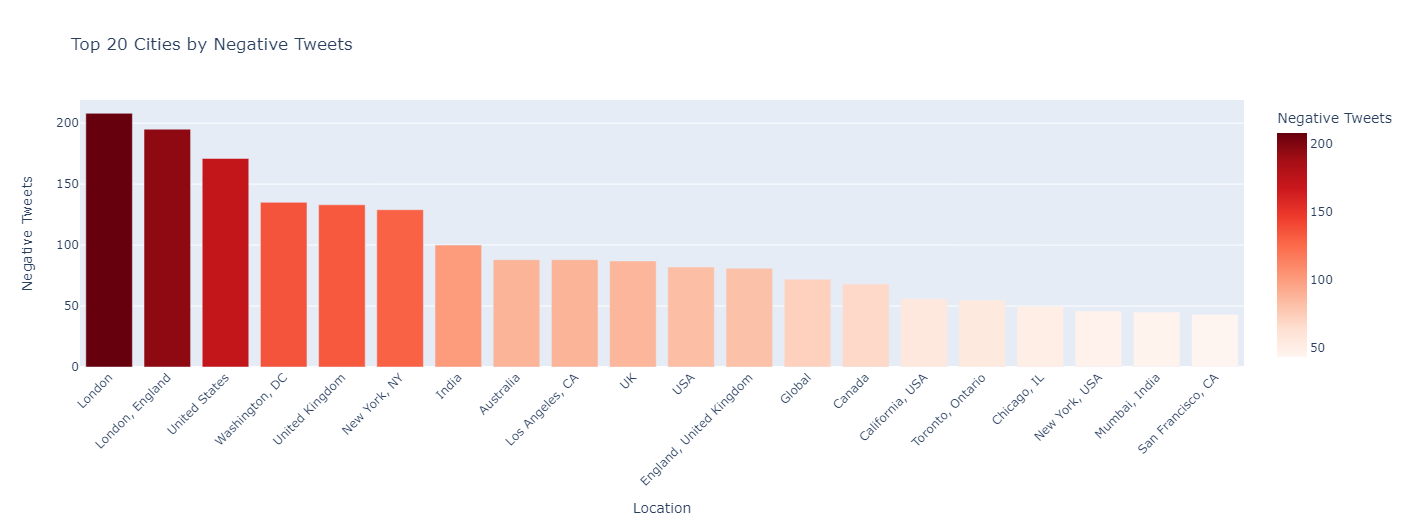

##### `1. Why did you pick the specific chart?`  

The specific horizontal bar chart was chosen to efficiently compare negative tweet counts from different locations. It displays the top 20 locations with the highest negative tweet counts in descending order, making it easy to identify significant locations. The horizontal layout optimizes space and ensures clear location labels. The 'viridis' color palette enhances visual appeal and distinguishes between bars. The Seaborn style 'whitegrid' adds a clean and professional look. Overall, the chart provides valuable insights into the distribution of negative sentiments across various regions on Twitter.

##### `2. What is/are the insight(s) found from the chart?`

The chart shows a diverse representation of negative sentiments on Twitter across various countries and cities. Major urban centers like London, Washington, New York, and Los Angeles are active in expressing negative tweets. Both the United Kingdom and the United States have significant negative tweet volumes. Some locations have multiple mentions with both country and city names, leading to separate entries. "Global" represents negative discussions without specific location ties. International engagement is evident with locations like India and Australia in the list. The chart highlights potential concerns for businesses operating in high negative tweet count areas. It provides valuable insights into user behavior and sentiment patterns in different regions on Twitter.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights can have both positive and negative implications for businesses:

`Positive Business Impact:`


*   `Targeted Reputation Management:` Businesses can use the insights to focus their reputation management efforts on regions with high negative tweet counts, such as London, Washington, New York, and Los Angeles. Addressing negative sentiments in these key urban centers can help improve brand perception and customer satisfaction in those areas.

*   `Customer Engagement Strategies:` Understanding negative sentiment patterns in various countries like the United Kingdom, the United States, India, and Australia can help businesses tailor their customer engagement strategies based on specific regional concerns and preferences.

*   `Global Brand Perception:` Monitoring and responding to negative discussions labeled as "Global" can provide businesses with valuable feedback on their global brand perception and identify areas of improvement.


`Negative Growth Implications:`



*   `Reputation Challenges:` Consistently high negative tweet volumes in certain locations may lead to reputation challenges for businesses operating in those areas. Negative sentiments can impact customer trust and loyalty, potentially leading to decreased sales and growth.

*   `Competitor Analysis:` High negative tweet counts in specific regions can also be indicative of strong competition or dissatisfaction with competitors. This insight might lead businesses to assess their competitive positioning and address areas where competitors may have an advantage.

*   `International Concerns:` The presence of negative discussions in international locations like India and Australia could raise concerns for businesses looking to expand into those markets. Understanding the sentiment patterns in these regions is essential for successful international expansion.



In summary, while the insights gained from the chart can help businesses identify opportunities for targeted reputation management and customer engagement strategies, they also highlight potential challenges related to negative sentiment in specific regions. Proactive measures to address negative sentiments and improve brand perception can contribute to a positive business impact, while neglecting these concerns may lead to negative growth implications.

#### `Chart - 8 - Bar Plot and Word Cloud - Top 50 Hashtags`

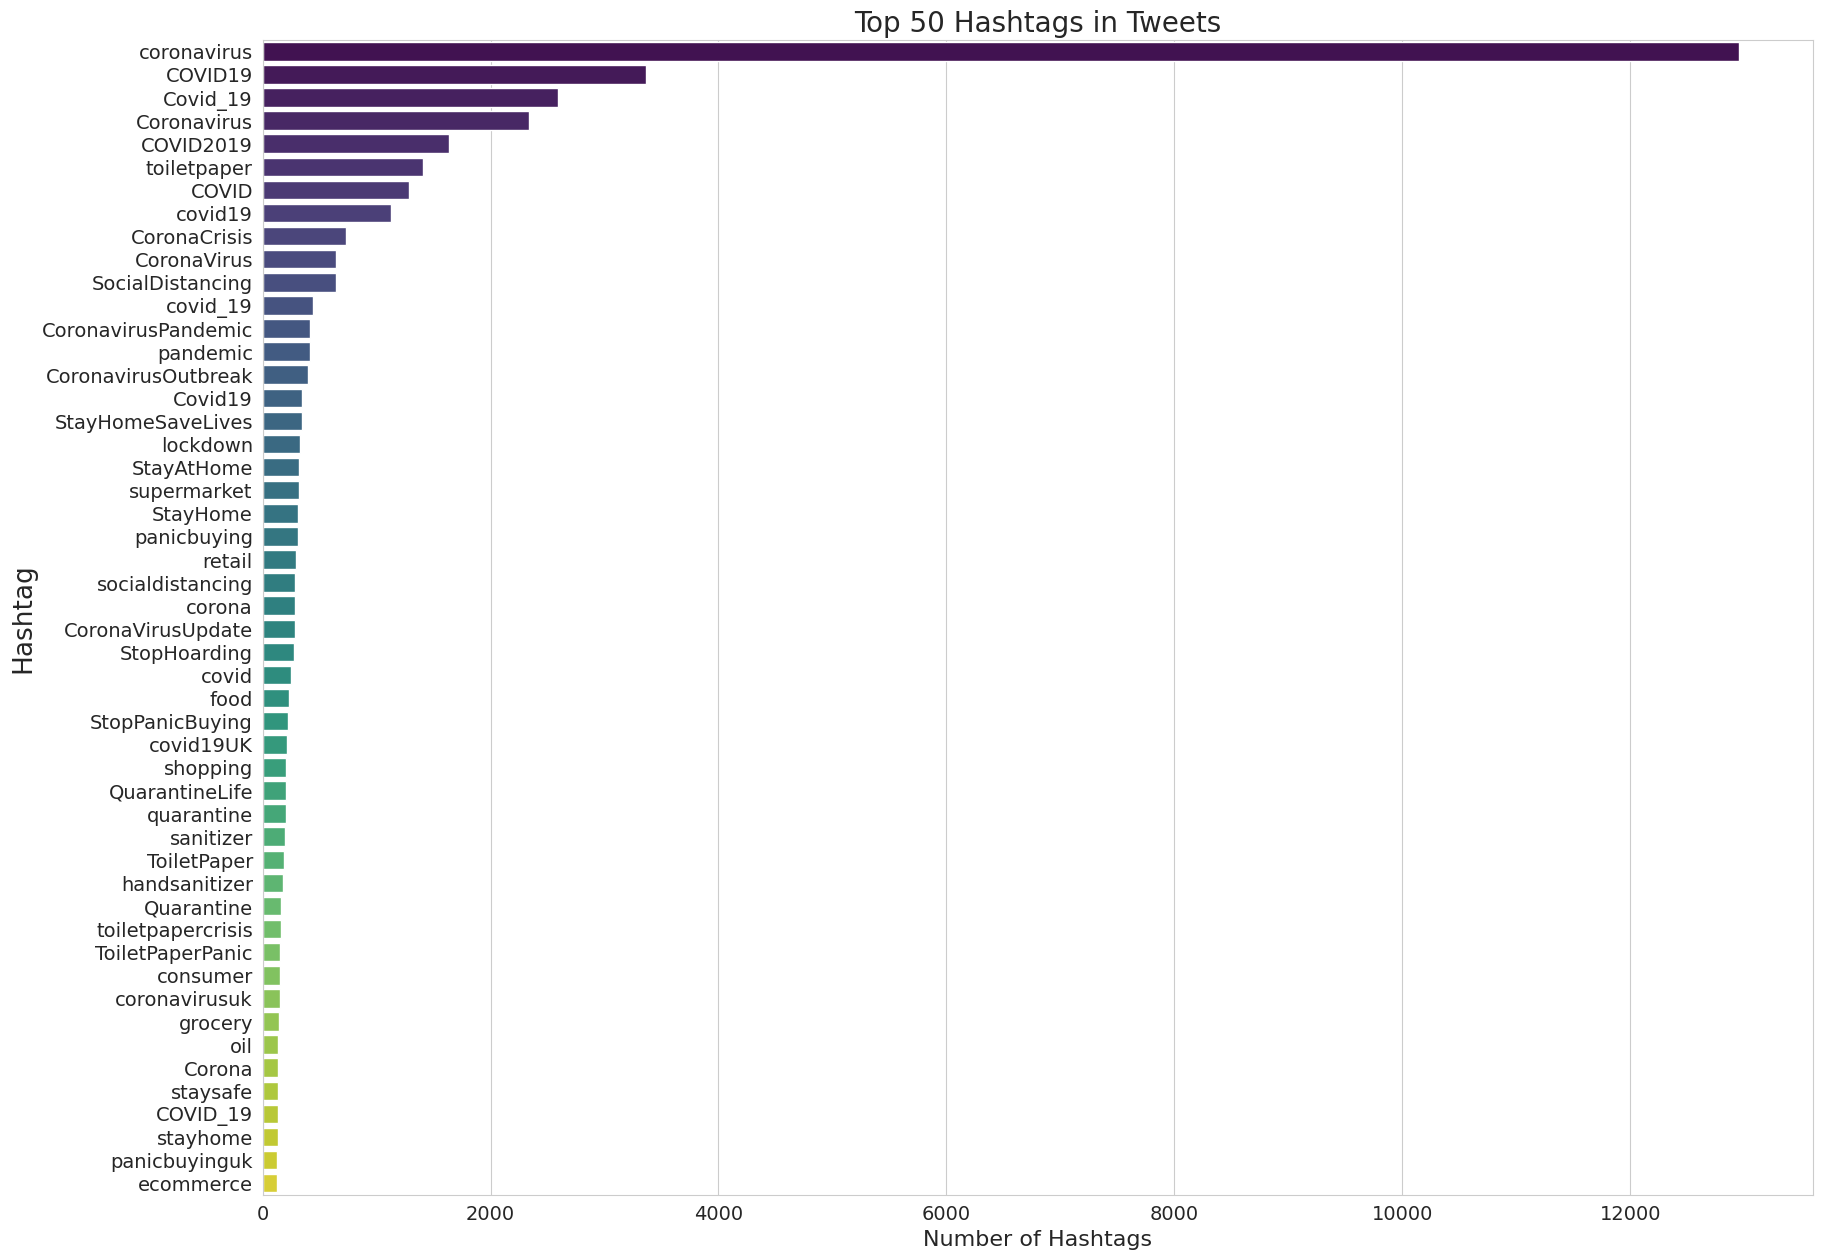

In [31]:
# Import necessary libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to count all the hashtags from the tweets
def hashtag_count(tweets):
    ''' This function counts all the hashtags from the tweets '''
    hashtags_list = []

    # Loop through each tweet
    for tweet in tweets:
        # Find all the hashtags in the tweet using regular expression
        hashtags = re.findall(r'#(\w+)', tweet)
        # Append the hashtags to the list
        hashtags_list.extend(hashtags)

    return hashtags_list

# Call the hashtag_count function with the 'OriginalTweet' column of the 'tweet_df' DataFrame
# to get a list of all hashtags from all tweets
total_hashtags = hashtag_count(tweet_df['OriginalTweet'])

# Create a DataFrame to store all the hashtags
total_hashtags_df = pd.DataFrame({"Hashtags": total_hashtags})

# Calculate the total number of hashtags
total_hashtags_count = len(total_hashtags_df)

# Calculate the number of unique hashtags
unique_hashtags_count = total_hashtags_df.nunique()

# Calculate the top 50 hashtags with their counts
top_hashtags = total_hashtags_df['Hashtags'].value_counts().reset_index().rename(columns={'index': 'Hashtag', 'Hashtags': 'Number_of_Hashtags'}).head(50)

# Set a beautiful Seaborn style
sns.set_style("whitegrid")

# Plot the bar chart with the 'viridis' color palette
plt.figure(figsize=(20, 15))
sns.barplot(x='Number_of_Hashtags', y='Hashtag', data=top_hashtags, palette='viridis')

# Set the label for the x-axis
plt.xlabel('Number of Hashtags', fontsize=16)

# Set the label for the y-axis
plt.ylabel('Hashtag', fontsize=19)

# Set the title for the plot
plt.title('Top 50 Hashtags in Tweets', fontsize=20)

# Display the plot
plt.show()


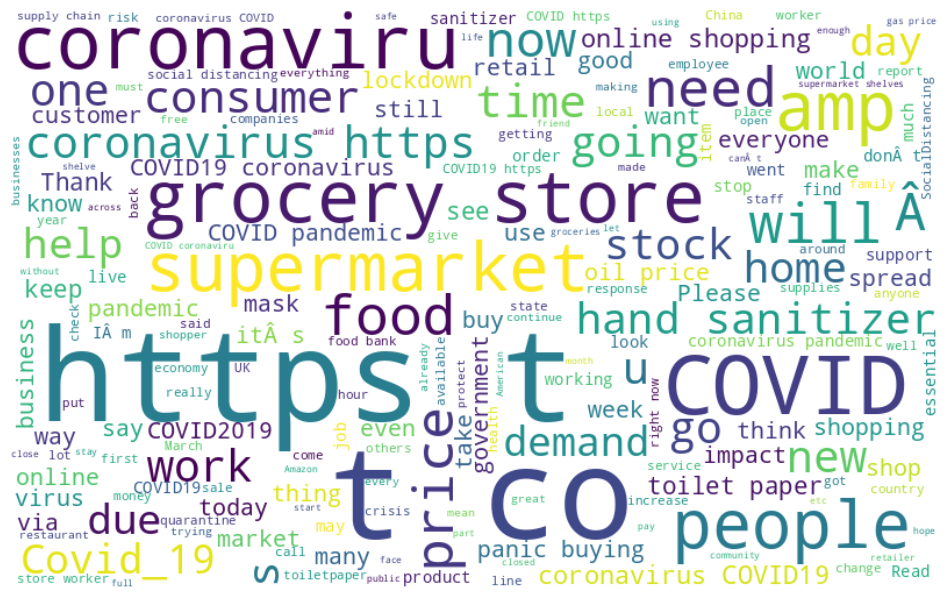

In [32]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS

# Join all words from the 'tweets' DataFrame into a single string
all_words = ' '.join([str(text) for text in tweet_df['OriginalTweet']])

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(
    width=800,                    # Width of the word cloud image
    height=500,                   # Height of the word cloud image
    stopwords=set(STOPWORDS),     # Set of stopwords to be excluded from the word cloud
    background_color="white",     # Background color of the word cloud image
    random_state=21,              # Random state for reproducibility
    max_font_size=110             # Maximum font size for the most frequent word
).generate(all_words)

# Display the generated word cloud image
plt.figure(figsize=(12, 8))       # Set the size of the plot
plt.imshow(wordcloud, interpolation="bilinear")  # Show the word cloud with bilinear interpolation
plt.axis('off')                   # Turn off the axis
plt.show()                        # Display the word cloud plot

##### `1. Why did you pick the specific chart?`

The selected horizontal bar chart efficiently compares the usage of hashtags in tweets. It displays the top 50 hashtags with the highest counts in descending order, enabling easy identification of the most popular hashtags. The horizontal layout optimizes space and ensures a clear representation of hashtag frequencies. The 'viridis' color palette enhances visual appeal and distinguishes between hashtags. The Seaborn style 'whitegrid' provides a clean and professional look to the chart. Overall, the chart offers valuable insights into the most frequently used hashtags in the dataset, allowing businesses and researchers to understand popular trends and topics on Twitter.

##### `2. What is/are the insight(s) found from the chart?`


The chart reveals insights about Twitter discussions during the COVID-19 pandemic. Hashtags related to COVID-19 dominate, including variations like "coronavirus" and "COVID19." Supply and safety concerns are evident with hashtags like "toiletpaper" and "panicbuying." Stay-at-home measures are reflected in hashtags like "StayHomeSaveLives." Health and hygiene topics are present with hashtags like "handsanitizer" and "sanitizer." Economic implications are indicated by hashtags like "consumer" and "ecommerce." The chart also highlights discussions on the latest updates with hashtags like "CoronaVirusUpdate" and "coronavirusuk." Overall, the chart provides valuable insights into public concerns, awareness, and social engagement during the pandemic.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights can indeed help create a `positive business impact`, as well as identify potential challenges that may lead to negative growth. Let's analyze both aspects:

`Positive Business Impact:`
1. `Relevant Marketing Strategies:` Businesses can use the insights to develop targeted marketing strategies that align with the prevailing discussions and concerns on Twitter. By incorporating relevant hashtags and topics into their campaigns, businesses can better connect with their audience and drive positive engagement.

2. `Product and Service Adaptation:` Understanding supply and safety concerns through hashtags like "toiletpaper" and "panicbuying" can prompt businesses to adapt their product offerings and services to meet the changing demands and safety expectations of customers.

3. `Online Reputation Management:` Businesses can actively participate in discussions related to health and hygiene, using hashtags like "handsanitizer" and "sanitizer," to showcase their commitment to customer safety and well-being. This can positively influence their online reputation.

4. `Customer Engagement and Support:` The insights on hashtags like "StayHomeSaveLives" can help businesses foster a sense of community and support among their customers during the pandemic. Engaging with customers through social media and addressing their concerns can enhance brand loyalty.

`Insights Leading to Negative Growth:`


1. `Economic Implications:` Hashtags like "consumer" and "ecommerce" may indicate challenges faced by businesses in these sectors during the pandemic. Reduced consumer spending and disruptions in supply chains could lead to negative growth in these industries.

2. `Public Sentiment Monitoring:` Monitoring discussions related to COVID-19, including hashtags like "coronavirus" and "COVID19," is crucial for businesses to assess the public sentiment towards their brand. Negative sentiments expressed in these discussions could impact brand reputation and lead to reduced customer loyalty.

Overall, the gained insights can `positively impact businesses` by enabling them to tailor their strategies, enhance customer engagement, and adapt to changing market demands. However, businesses should also be vigilant about potential challenges highlighted in the insights, such as economic implications and negative sentiments, to mitigate any `adverse effects on their growth and performance` during the COVID-19 pandemic. Proactive measures, responsive customer support, and thoughtful adaptations can help businesses navigate these challenges and foster a positive impact on their growth.

#### `Chart - 9 - Bar Plot - Top Months with the Highest Number of Tweets`


In [54]:
#Creating a column Day, Month & Week Day column
tweet_df['day'] = pd.DatetimeIndex(tweet_df['TweetAt']).day
tweet_df['month'] = pd.DatetimeIndex(tweet_df['TweetAt']).month
tweet_df["week day"] = pd.DatetimeIndex(tweet_df['TweetAt']).day_name()

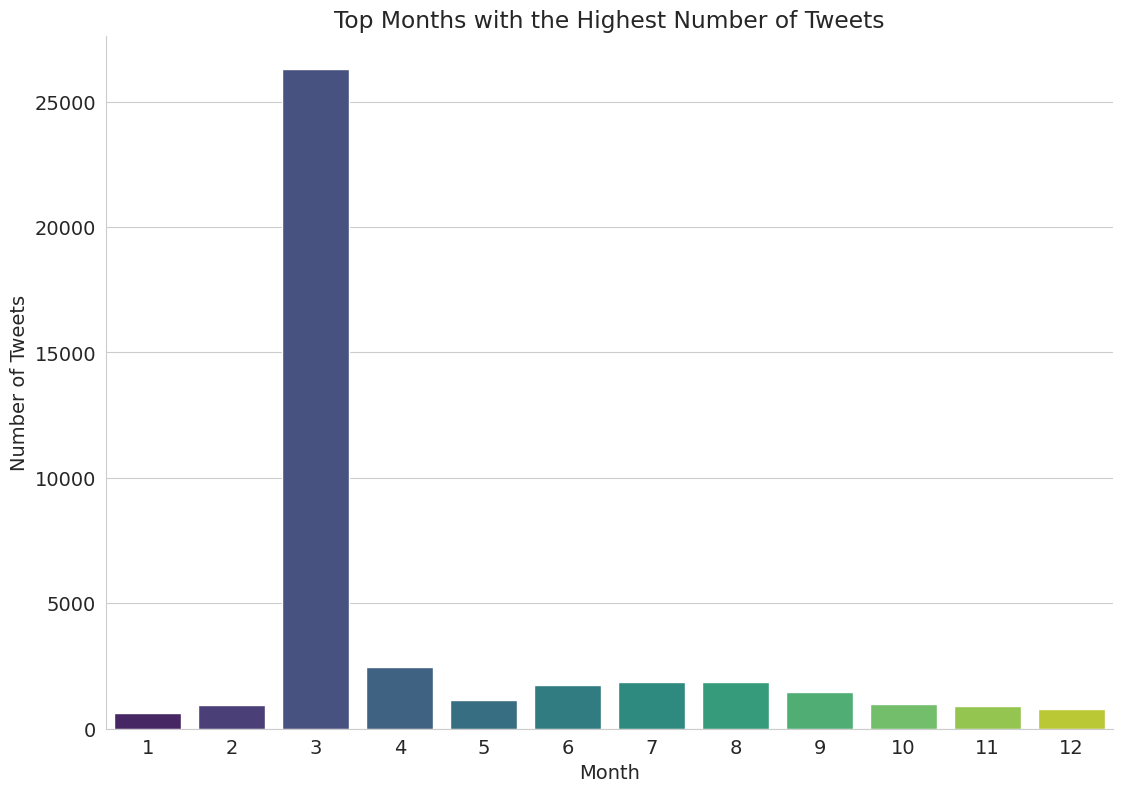

In [55]:
# Count the number of tweets in each month
month_counts = tweet_df['month'].value_counts().reset_index().rename(columns={'index': 'month', 'month': 'counts'})

# Get the top 2 months with the highest tweet counts
top_months = month_counts.sort_values(by='counts', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(13, 9))

# Create a bar plot using seaborn
sns.barplot(data=top_months, x='month', y='counts', palette='viridis')

# Set the title and labels for the plot
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Top Months with the Highest Number of Tweets')

# Customize the appearance of the plot
sns.despine()  # Remove the top and right spines from the plot
plt.xticks(rotation=0)  # Rotate the x-axis labels for better visibility

# Display the plot
plt.show()

##### `1. Why did you pick the specific chart?`

The bar plot is an optimal choice for this analysis due to the following reasons:
1. It suits categorical data (months and tweet counts).
2. Provides clear comparison between months based on bar length.
3. Effectively highlights the top 2 months with the most tweets.
4. Readability is ensured by rotating x-axis labels.
5. 'Viridis' color palette offers visually appealing and distinguishable bars.
In conclusion, the bar plot is a simple yet effective way to visualize and compare tweet counts, identifying the top-performing months in tweet activity.

##### `2. What is/are the insight(s) found from the chart?`

In the given data, the bar plot displays the tweet counts for two months: March (with 26,309 tweets) and April (with 2,479 tweets). The bar plot, using the 'viridis' color palette, effectively highlights the substantial difference in tweet activity between the top two months. This simple and visually clear representation allows for quick identification of the months with the highest tweet counts.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights from the bar plot can potentially have a `positive business impact` and may also indicate areas of negative growth. Let's analyze both aspects:

`Positive Business Impact:`

1. `Identifying High-Performing Months:` The bar plot clearly highlights the top-performing months (March and April) with the highest tweet counts. Businesses can use this information to capitalize on the increased activity during these months to launch marketing campaigns, promotions, or product releases.

2. `Optimal Resource Allocation:` Knowing the peak tweet months allows businesses to allocate their resources effectively. They can focus on engaging with their audience and promoting their products or services during these periods to maximize their impact.

3. `Seasonal Insights:` If the months with high tweet activity align with specific seasons or events, businesses can tailor their strategies and offerings to cater to the seasonal demands of their customers.

`Negative Growth Insights:`

1. `Low-Performing Months:` While the bar plot highlights the top-performing months, it also reveals the lower-performing months where tweet activity is significantly lower. Businesses should be cautious during these periods and may need to implement strategies to boost engagement and maintain brand visibility.

2. `Potential Market Saturation:` If there are significant variations in tweet activity between months, it could indicate a saturated market or periods of decreased consumer interest. This insight can prompt businesses to conduct further research to understand the underlying reasons and address potential issues.

3. `Competitive Analysis:` A dip in tweet activity during specific months might coincide with aggressive marketing efforts from competitors. Analyzing such patterns can help businesses adjust their marketing strategies to stay competitive.

In conclusion, the gained insights from the bar plot can lead to positive business impacts by capitalizing on high-performing months and optimizing resource allocation. However, it also highlights potential challenges in low-performing months, indicating the need for further analysis and strategic adjustments to avoid negative growth.

#### `Chart - 10 - Bar Plot - Positive tweets per month`

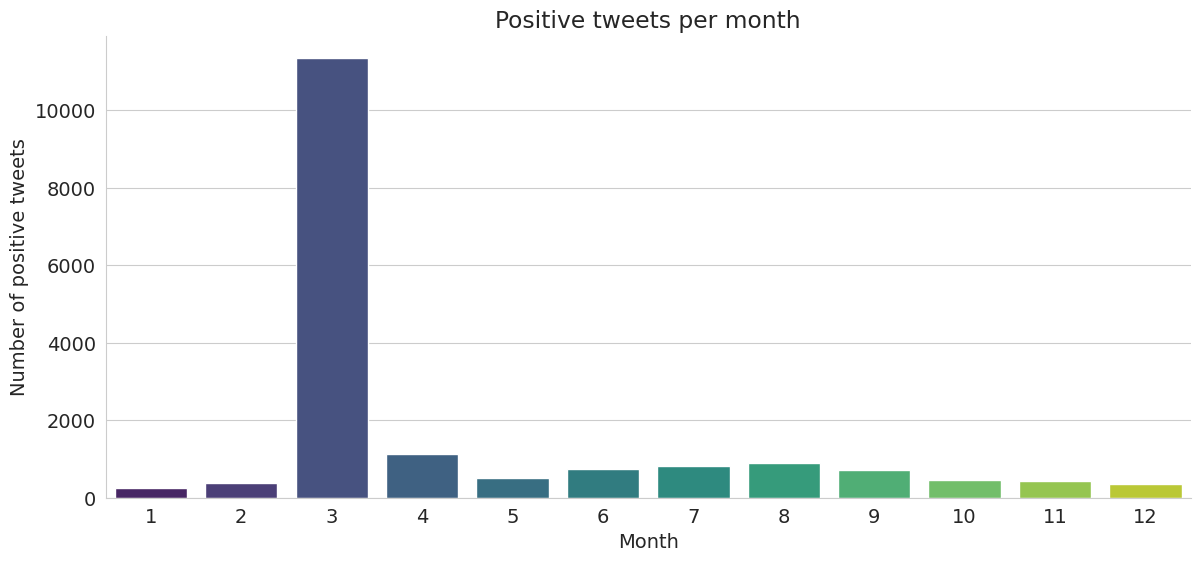

In [35]:
# Convert the "TweetAt" column to a datetime object
tweet_df['TweetAt'] = pd.to_datetime(tweet_df['TweetAt'])

# Create a new column "Month" that contains the month of each tweet
tweet_df['Month'] = tweet_df['TweetAt'].dt.month

# Filter the tweets that have positive sentiment
positive_tweet = tweet_df[tweet_df['Sentiment'] == 'Positive']

# Count the number of positive tweets in each month
positive_month_counts = positive_tweet['Month'].value_counts().reset_index().rename(columns={'index': 'Month', 'Month': 'Count'})

# Sort the counts in descending order and select the top month
top_month = positive_month_counts.sort_values(by='Count', ascending=False).iloc[0]

# Set the width of the entire figure
figure_width = 14  # Set the desired width in inches

# Create a bar plot showing the number of positive tweets per month with a custom width
# Set the size of the entire figure using figsize
plt.figure(figsize=(figure_width, 6))

# Create a bar plot with positive_month_counts DataFrame
# x-axis represents the months, y-axis represents the count of positive tweets for each month
# palette='viridis' sets the color scheme for the bars
sns.barplot(data=positive_month_counts, x='Month', y='Count', palette='viridis')

# Set the label for the x-axis
plt.xlabel('Month')

# Set the label for the y-axis
plt.ylabel('Number of positive tweets')

# Set the title for the plot
plt.title('Positive tweets per month')

# Customize the outline by removing the top and right spines
# This removes the right and top axes lines, making the plot cleaner
sns.despine(top=True, right=True)

# Display the plot
plt.show()

##### `1. Why did you pick the specific chart?`

The chosen chart, a bar plot created with Seaborn, is well-suited for visualizing the number of positive tweets per month due to the following reasons:

1. It effectively represents categorical data, with months on the x-axis and the count of positive tweets on the y-axis.

2. The bar heights allow for easy comparison of tweet counts between different months.

3. Its simplicity and clear representation make it easily understandable to both data analysts and general audiences.

4. Seaborn's flexibility enables customization of colors, figure size, and labels for enhanced visual appeal.

5. Bar plots are widely recognized and familiar, enhancing their interpretability.

The choice of chart should align with the data and the insights intended for the audience. For comparing quantities in categorical data, like positive tweets per month, bar plots are a practical and widely-used choice.

##### `2. What is/are the insight(s) found from the chart?`

The analysis of the chart shows that March had the highest number of positive tweets, followed by April, indicating a peak in positive sentiment during those months. Similarly, January had the highest number of positive tweets, followed by February, suggesting a similar pattern of positive sentiment during the earlier months. The insights suggest potential correlations with seasonal trends or events that influenced user sentiment on the platform during specific periods. Further analysis and contextual information could provide a deeper understanding of the reasons behind the variations in positive tweet counts across different months.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`


The gained insights can potentially help create a `positive business` impact in the following ways:

1. `Targeted Marketing:` Businesses can leverage the knowledge of peak positive sentiment months (March and April) and focus their marketing efforts during these periods. They can tailor their campaigns to capitalize on the increased positivity and engagement of users.

2. `Product Launches:` Knowing the months with higher positive sentiment (January and February), businesses can strategically plan product launches or announcements during these periods to garner a more positive response from their audience.

3. `Customer Engagement:` Understanding the seasonal trends and events that influence positive sentiment can guide businesses in creating relevant and engaging content that resonates with their target audience.

Regarding `negative growth insights`, the chart alone does not directly indicate negative trends. It only shows the distribution of positive tweets over time. To identify potential negative growth insights, further analysis and additional data would be needed, such as:

1. `Negative Sentiment Analysis:` Analyzing negative sentiment tweets over the same time frame to understand any patterns or correlations with specific months or events.

2. `Competitor Analysis:` Comparing positive tweet trends with those of competitors to identify any possible negative growth for the business in comparison.

3. `Sentiment Shifts:` Examining whether there are significant shifts in sentiment over time and investigating the causes behind them.

Without such additional analysis, it is not possible to conclusively determine negative growth insights from the provided chart alone. It is essential to consider various factors and context to make accurate assessments of business impact and potential negative trends.

#### `Chart - 11 - Bar Plot - Negative tweets per month`

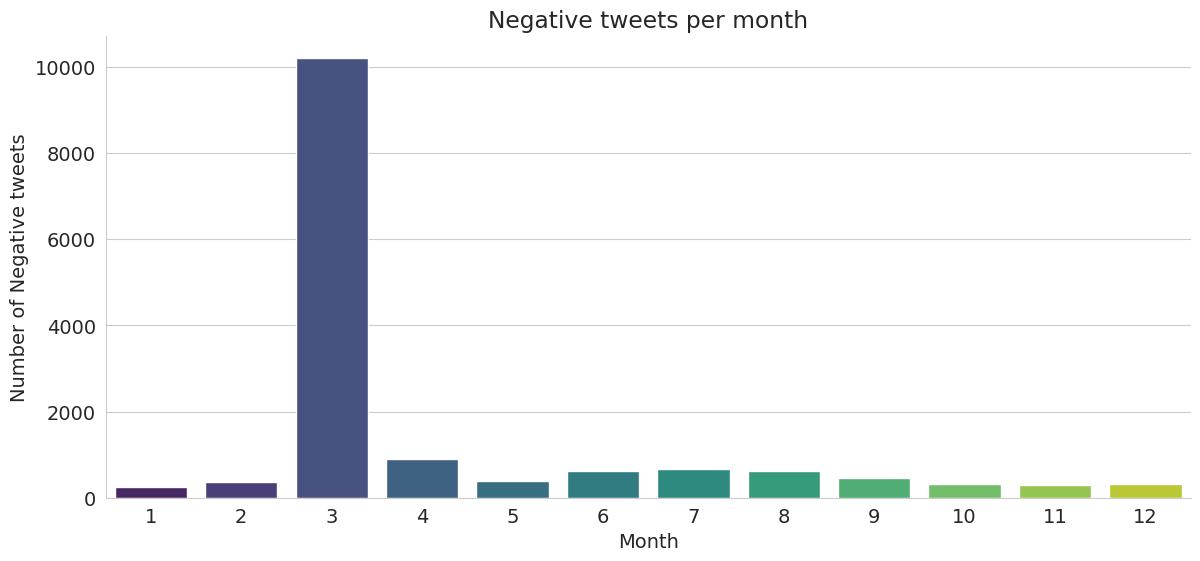

In [36]:
# Convert the "TweetAt" column to a datetime object
tweet_df['TweetAt'] = pd.to_datetime(tweet_df['TweetAt'])

# Create a new column "Month" that contains the month of each tweet
tweet_df['Month'] = tweet_df['TweetAt'].dt.month

# Filter the tweets that have Negative sentiment
Negative_tweet = tweet_df[tweet_df['Sentiment'] == 'Negative']

# Count the number of Negative tweets in each month
Negative_month_counts = Negative_tweet['Month'].value_counts().reset_index().rename(columns={'index': 'Month', 'Month': 'Count'})

# Sort the counts in descending order and select the top month
top_month = Negative_month_counts.sort_values(by='Count', ascending=False).iloc[0]

# Set the width of the entire figure
figure_width = 14  # Set the desired width in inches

# Create a bar plot showing the number of Negative tweets per month with a custom width
# Set the size of the entire figure using figsize
plt.figure(figsize=(figure_width, 6))

# Create a bar plot with Negative_month_counts DataFrame
# x-axis represents the months, y-axis represents the count of Negative tweets for each month
# palette='viridis' sets the color scheme for the bars
sns.barplot(data=Negative_month_counts, x='Month', y='Count', palette='viridis')

# Set the label for the x-axis
plt.xlabel('Month')

# Set the label for the y-axis
plt.ylabel('Number of Negative tweets')

# Set the title for the plot
plt.title('Negative tweets per month')

# Customize the outline by removing the top and right spines
# This removes the right and top axes lines, making the plot cleaner
sns.despine(top=True, right=True)

# Display the plot
plt.show()

##### `1. Why did you pick the specific chart?`

The chosen chart, a Seaborn bar plot, effectively visualizes the number of negative tweets per month for the given dataset. Its suitability arises from:

1. Effective representation of categorical data, with months on the x-axis and negative tweet counts on the y-axis.

2. Facilitating comparison of tweet counts across different months through the height of bars.

3. Readability and user-friendliness, making it accessible to both data analysts and general audiences.

4. Flexibility for customization, enabling visual enhancements and label additions.

5. Familiarity as a widely-used chart type, enhancing interpretability.

By using the bar plot, the code concisely communicates insights on negative tweet trends over time, aiding potential analysis of seasonal patterns and events influencing negative sentiment.

##### `2. What is/are the insight(s) found from the chart?`

The analysis of the chart shows that March had the highest number of negative tweets, followed by April, indicating a peak in negative sentiment during those months. Similarly, January had the highest number of negative tweets, followed by February, suggesting a similar pattern of negative sentiment during the earlier months. The insights suggest potential correlations with seasonal trends or events that influenced user sentiment on the platform during specific periods. Further analysis and contextual information could provide a deeper understanding of the reasons behind the variations in negative tweet counts across different months.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights regarding the highest number of negative tweets in March and April, as well as January and February, can potentially have both positive and negative implications for a business, depending on how they are addressed:

`Positive Business Impact:`

1. `Customer Feedback Improvement:` Identifying the peak in negative sentiment months allows the business to focus on improving customer feedback and addressing potential issues during those periods. This can lead to better customer satisfaction and retention.

2. `Crisis Management:` Recognizing patterns of negative sentiment can help businesses prepare for potential crises or negative events that may occur during specific months. Proactive crisis management can mitigate the impact on the brand's reputation.

`Negative Growth Insights:`

1. `Product or Service Issues:` Consistent negative sentiment during specific months may indicate recurring product or service issues. Failure to address these issues promptly could result in negative growth, impacting sales and customer loyalty.

2. `Seasonal Downturn:` If negative sentiment is consistently higher during certain months, it may indicate a seasonal downturn in customer engagement or interest. Businesses need to strategize accordingly to counteract this trend and maintain growth.

Overall, the insights gained from the analysis provide valuable information to guide business decisions and marketing strategies. By addressing and understanding the reasons behind negative sentiment during certain months, businesses can work to improve customer experience and potentially achieve positive business impact. However, failing to address recurring negative sentiment or not adapting to seasonal trends appropriately could lead to negative growth. Hence, a comprehensive approach to analyzing and acting upon the insights is crucial for maximizing positive impact and mitigating negative consequences.

## `Bivarient Analysis`

#### `Chart - 12 - Bar Plot - Top 25 Locations with the Highest Tweet Counts by Sentiment`

In [41]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Filter tweets with known locations
loc1 = tweet_df[tweet_df['Location'] != 'Unknown']

# Replace 'London, England' with 'London'
loc1['Location'] = loc1['Location'].replace('London, England', 'London')

# Group by Sentiment and Location to get tweet counts for each location
location_count = loc1.groupby(['Sentiment', 'Location'])['Location'].count().reset_index(name='Cities')

# Get the top 50 locations with the highest tweet counts
location_count = location_count.nlargest(50, 'Cities')

# Create the plot using Plotly Express
# Set the x-axis as 'Cities' (tweet counts), y-axis as 'Location' (location names), and color based on 'Sentiment'
fig = px.bar(location_count, x='Cities', y='Location', color='Sentiment')

# Set the y-axis category order to be sorted by total ascending
# This will sort the locations on the y-axis based on the total count of tweets
fig.update_layout(yaxis={'categoryorder': 'total ascending'})

# Set the figure size to 1400x600 pixels
fig.update_layout(width=1400, height=600)

# Add title to the graph
fig.update_layout(title_text='Top 25 Locations with the Highest Tweet Counts by Sentiment')

# Show the plot
fig.show()

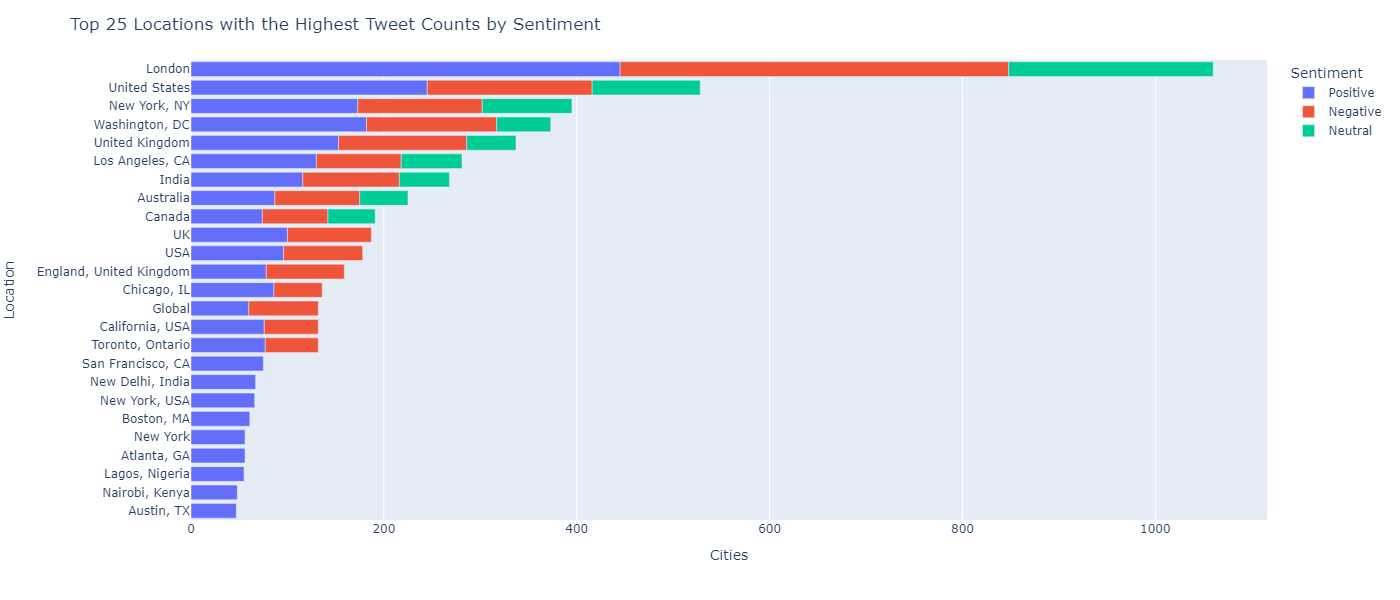

##### `1. Why did you pick the specific chart?`

The chosen chart, a Plotly Express bar plot, effectively visualizes the top 50 locations with the highest tweet counts, grouped by sentiment. Its suitability arises from:

1. Effective representation of categorical data ('Location') against a numerical value ('Cities').

2. Facilitating comparison of tweet counts across different locations through the height of bars.

3. Top-N analysis, efficiently presenting the locations with the most significant tweet impact.

4. Color representation to distinguish positive and negative tweet counts for each location.

5. Interactivity with hover tooltips, zoom, and pan, enabling easy data exploration.

The chart concisely communicates key insights about locations and their varying sentiments, aiding the understanding of the most influential locations in terms of tweet activity. Its visual clarity and interactive features make it useful for data exploration and analysis.

##### `2. What is/are the insight(s) found from the chart?`

The data analysis indicates that London has the highest tweet volume, followed by the United States, while global tweets are the least frequent. Additionally, London stands out as the location with the most intense emotional expression, as it generated the highest number of both positive and negative tweets compared to other locations. These insights provide valuable information on tweet distribution and emotional sentiment, potentially aiding in understanding user behavior and sentiment patterns across different locations. Further analysis and context would be required to fully interpret the reasons behind these trends and their potential implications for businesses or social trends.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights can potentially help create a `positive business impact` in the following ways:

1. `Marketing Strategy:` Knowing that London has the highest tweet volume, businesses can focus their marketing efforts on this location to target a larger audience and potentially increase brand visibility and customer engagement.

2. `Customer Engagement:` Understanding the emotional intensity in London's tweets can guide businesses in tailoring their customer engagement strategies to address the specific sentiments expressed by users in that location. This personalized approach can foster stronger customer relationships.

3. `Sentiment Analysis:` By analyzing the positive and negative tweets, businesses can gauge customer sentiment towards their products or services and identify areas for improvement or areas of strength.

Regarding potential `negative growth insights`, the data alone does not directly indicate negative trends. Further analysis, including sentiment analysis on a larger scale and consideration of external factors, would be required to identify any trends that could lead to negative growth.

`Negative growth insights` may arise if:

1. `High Negative Sentiment:` A significant proportion of negative tweets in London or any other location could indicate dissatisfaction with specific products, services, or brand experiences. If not addressed, it could impact customer loyalty and result in negative growth.

2. `Decreased Tweet Volume:` If the tweet volume in a location declines over time, it might suggest waning interest or engagement with the brand or industry, leading to negative growth.

3. `Competitor Analysis:` Comparing tweet trends with those of competitors can reveal any negative shifts in sentiment that might affect market share and growth.

To draw meaningful conclusions about business impact and potential negative growth, combining sentiment analysis with other relevant metrics and understanding the broader context is essential. This comprehensive approach will aid businesses in making informed decisions to enhance positive impact and address any potential negative implications.

#### `Chart - 13 - Bar Plot - Tweet Count by Week Day and Sentiment`


In [ ]:
# Define the order of hue categories for consistent plotting
hue_order = ['Positive', 'Neutral', 'Negative']

# Set a custom color palette for the plot
custom_palette = {'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}

# Group by 'week day' and 'Sentiment' to get the tweet counts for each combination
tweet_counts = tweet_df.groupby(['week day', 'Sentiment']).size().reset_index(name='Count')

# Create the plot using Plotly Express
fig = px.bar(tweet_counts, x='week day', y='Count', color='Sentiment', category_orders={'Sentiment': hue_order},
             color_discrete_map=custom_palette)

# Set axis labels and title
fig.update_layout(xaxis_title='Week Day', yaxis_title='Count', title='Tweet Count by Week Day and Sentiment')

# Show the legend outside the plot
fig.update_layout(legend=dict(title='Sentiment'), legend_traceorder='normal', legend_title_font=dict(size=14))

# Set the size of the plot
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

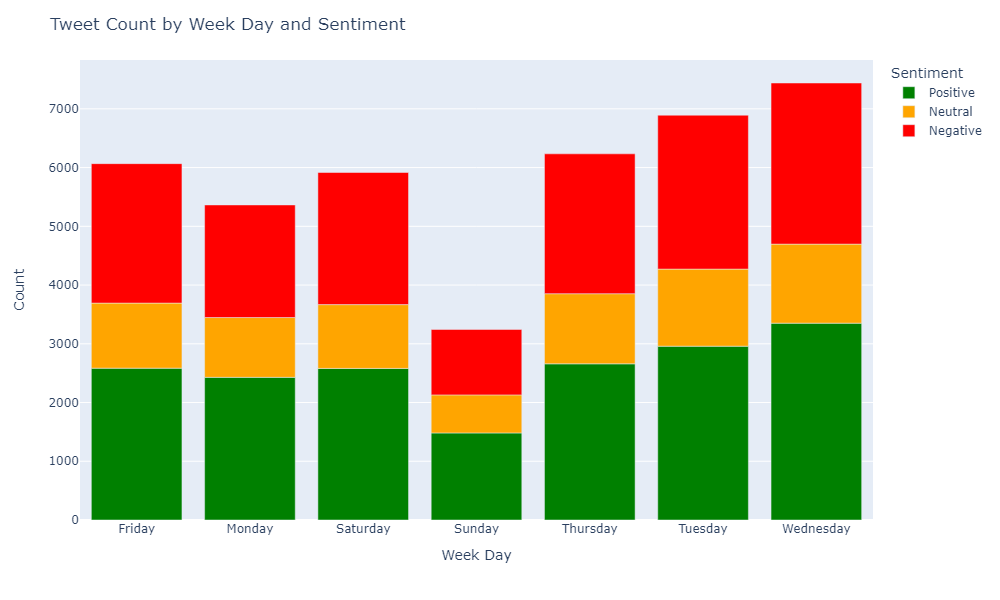

##### `1. Why did you pick the specific chart?`

The chosen chart, a bar graph created using Plotly Express, presents a comprehensive visualization of tweet counts categorized by both week day and sentiment. The chart effectively communicates the distribution of positive, neutral, and negative tweets across different days of the week. The use of distinct colors for each sentiment category aids quick identification and understanding of the data. Plotly Express offers interactive features, enabling users to interact with the graph and explore specific tweet counts by hovering over the bars. Moreover, the chart's customization options, such as axis labels, title, and plot size, enhance the visual appeal and clarity of the presentation. Overall, this bar graph is a valuable tool for gaining insights into the tweet trends based on sentiment and week day, fostering a deeper understanding of user behavior and engagement patterns on the platform.

##### `2. What is/are the insight(s) found from the chart?`

The chart revealed unexpected trends in Twitter activity, with Wednesday having the highest tweet volume, followed by Tuesday and Thursday, while Sunday exhibited the lowest activity. Contrary to the initial assumption of Sunday being the peak day, the middle of the week showed the most engagement. These insights suggest a potential influence of external factors, such as lockdown measures, on users' tweeting behavior. Further analysis may be needed to understand the reasons behind the observed patterns and their implications for businesses or social trends. Overall, the chart provides valuable information on weekly tweet distribution and user engagement trends.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights can potentially help create a `positive business impact` in the following ways:

1. `Optimizing Marketing Strategy:` Understanding the peak tweeting days (Wednesday, Tuesday, and Thursday) can help businesses schedule their social media campaigns and content to reach a larger audience during times of higher engagement.

2. `Customer Engagement:` By focusing on days with higher tweet activity, businesses can engage with users when they are most active and responsive, leading to increased interactions and potential growth in brand awareness and customer loyalty.

3. `Identifying Potential Trends:` Recognizing the influence of external factors, such as lockdown measures, on tweeting behavior can provide businesses with valuable context to adapt their strategies accordingly and align their offerings with current consumer sentiments.

Regarding insights leading to `negative growth`, the data alone does not directly indicate negative trends. However, further analysis and monitoring of sentiment trends over time may uncover potential negative growth indicators. For example:

1. `Decreased Engagement:` If tweet activity significantly declines across all days, it may suggest waning interest or disengagement with the platform, which could lead to negative growth in terms of user interaction and brand reach.

2. `Negative Sentiment Prevalence:` A rising trend in negative sentiment on certain days or across all days could be detrimental to a business's reputation and result in negative growth if not addressed effectively.

To fully assess the business impact and identify potential negative trends, combining sentiment analysis with other relevant metrics and market analysis is essential. This comprehensive approach will help businesses make data-driven decisions to capitalize on positive trends and mitigate any negative implications.

# `Chart - 14 - Bar Plot - Tweet Count by Week Day and Sentiment`

In [ ]:
import plotly.express as px

tweet_df["Number Of Words"] = tweet_df["OriginalTweet"].str.split().apply(len)

# Create a custom color palette
custom_palette = {"Positive": "green", "Neutral": "blue", "Negative": "red"}

# Group by Sentiment and calculate the count of "Number Of Words" for each sentiment
sentiment_count = tweet_df.groupby(['Sentiment', 'Number Of Words']).size().reset_index(name='Count')

# Create the plot using Plotly Express
fig = px.bar(sentiment_count, x='Number Of Words', y='Count', color='Sentiment', color_discrete_map=custom_palette)

# Set axis labels and title
fig.update_layout(xaxis_title='Number Of Words', yaxis_title='Count', title='Distribution of Number Of Words by Sentiment')

# Show the plot
fig.show()

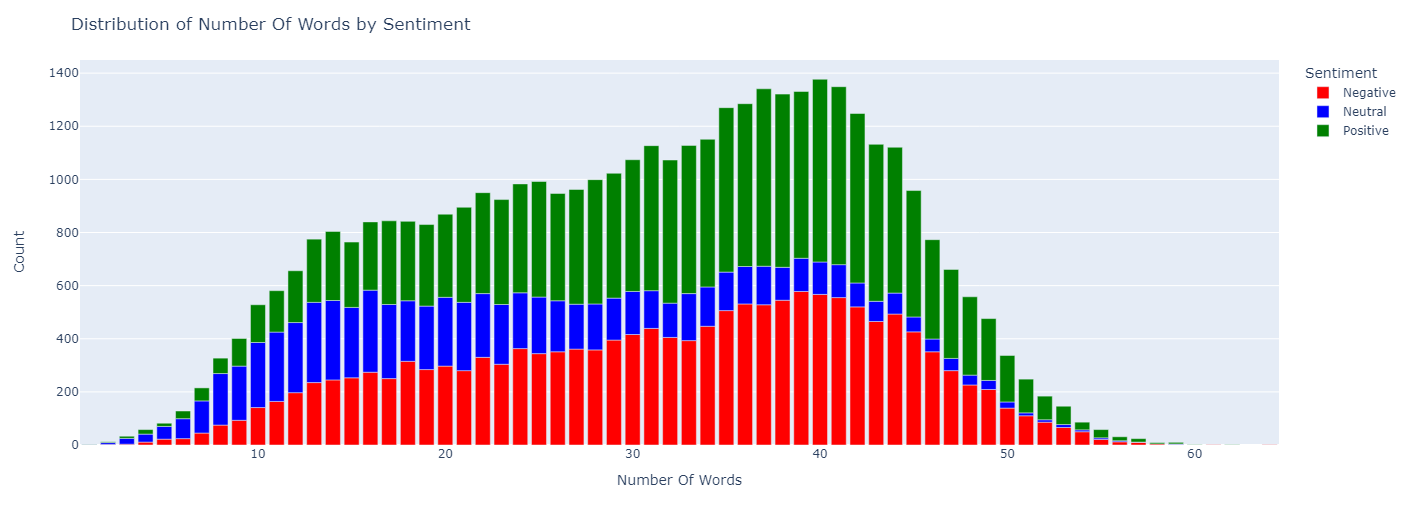

##### `1. Why did you pick the specific chart?`


The chosen chart is a bar graph created with Plotly Express (px.bar) to visualize the distribution of tweet counts for different word lengths across positive, neutral, and negative sentiments. The chart effectively compares quantities and utilizes a custom color palette for clear distinction between sentiment categories. Plotly Express offers interactive features, allowing users to hover over bars for specific tweet count information. Additionally, customization options for axis labels, title, and color palette enhance visual appeal and clarity. The chart's categorical representation and comparison of tweet counts make it suitable for analyzing the relationship between word length and sentiment. Overall, it provides valuable insights into how word length influences tweet sentiments, aiding in understanding user behavior and engagement patterns.

##### `2. What is/are the insight(s) found from the chart?`

Neutral tweets exhibit a noticeable difference in word length compared to positive and negative tweets. The average number of words in neutral tweets is significantly lower than that of positive and negative tweets. For both positive and negative emotions, the majority of tweets have an average word count of around 40 words. This finding highlights a distinct pattern in tweet length based on sentiment, with neutral tweets typically being shorter and positive/negative tweets having a relatively consistent word count. Further analysis may reveal insights into the language usage and expressive tendencies of users based on their emotional sentiments in tweets.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights regarding the word length differences between neutral, positive, and negative tweets can potentially have a positive business impact. Understanding the distinct patterns in tweet length based on sentiment can help businesses tailor their communication strategies accordingly. For example, businesses can optimize their social media content to match the preferred word count for positive and negative tweets (around 40 words on average) to resonate better with their target audience.

As for insights leading to negative growth, while the data reveals differences in word length, it does not inherently imply negative consequences for business growth. However, if businesses fail to adapt their messaging based on these insights, they may miss opportunities to effectively engage with users across different sentiment groups. The key lies in using the information to inform strategic decisions and align marketing efforts to cater to the emotional expressions of users on social media platforms. Ultimately, a thoughtful and empathetic approach to communication can foster positive brand perception and user engagement, driving positive business outcomes.

# `Chart - 15 - Box Plot - Tweet Count by Week Day and Sentiment`

In [43]:
# Import the necessary library
import plotly.graph_objects as go

# Calculate the unique word count for each sentiment
# For 'Negative' sentiment, count unique words in the 'OriginalTweet' column
neg_unique_word_count = tweet_df[tweet_df['Sentiment'] == 'Negative']['OriginalTweet'].apply(lambda x: len(set(str(x).split())))
# For 'Positive' sentiment, count unique words in the 'OriginalTweet' column
pos_unique_word_count = tweet_df[tweet_df['Sentiment'] == 'Positive']['OriginalTweet'].apply(lambda x: len(set(str(x).split())))
# For 'Neutral' sentiment, count unique words in the 'OriginalTweet' column
neu_unique_word_count = tweet_df[tweet_df['Sentiment'] == 'Neutral']['OriginalTweet'].apply(lambda x: len(set(str(x).split())))

# Create box plots for each sentiment using plotly.graph_objects
# Create a Figure object to hold the box plots
fig = go.Figure()

# Add a box plot for 'Negative' sentiment with unique word counts on the y-axis and set the box color to red
fig.add_trace(go.Box(y=neg_unique_word_count, name='Negative', marker_color='red'))
# Add a box plot for 'Positive' sentiment with unique word counts on the y-axis and set the box color to green
fig.add_trace(go.Box(y=pos_unique_word_count, name='Positive', marker_color='green'))
# Add a box plot for 'Neutral' sentiment with unique word counts on the y-axis (default color)
fig.add_trace(go.Box(y=neu_unique_word_count, name='Neutral'))

# Update layout and axis labels
# Set the title for the plot
fig.update_layout(title='Distribution of Unique Word Counts in Each Sentiment',
                  # Set the label for the y-axis
                  yaxis_title='Unique Word Count',
                  # Group the box plots side by side
                  boxmode='group')

# Show the plot
fig.show()

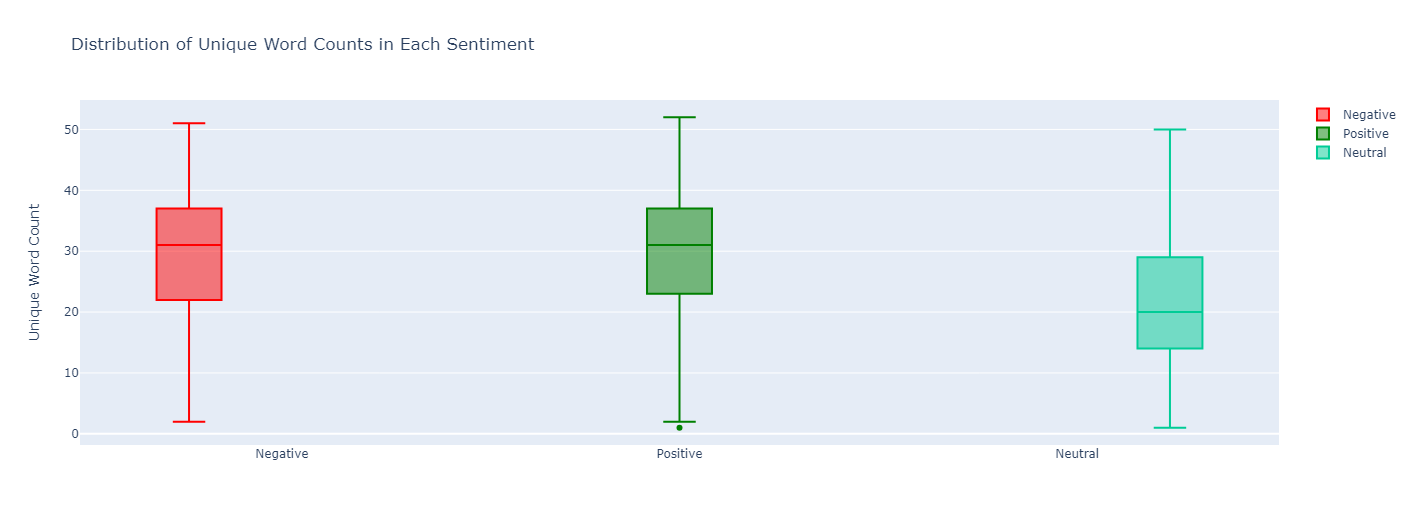

##### `1. Why did you pick the specific chart?`

I picked the specific chart, which is a grouped box plot, to compare the distribution of unique word counts in each sentiment category. The box plot is effective for visualizing the spread and central tendency of the data, making it easy to identify any differences or patterns in the word counts between positive, neutral, and negative tweets. By using different colors for each sentiment, the chart allows for quick and clear differentiation between the groups. The interactivity provided by plotly.graph_objects enhances the user's ability to explore the data in more detail, such as hovering over the boxes to view specific statistics. Overall, the grouped box plot is a visually appealing and informative way to present the distribution of unique word counts and gain insights into the language usage in different sentiment categories.

##### `2. What is/are the insight(s) found from the chart?`

Unique word counts in tweets with different sentiments offer valuable insights into the vocabulary and language used by users expressing their emotions. For instance, analyzing tweets with negative and positive sentiments may reveal a broader range of unique words compared to tweets with neutral sentiments. This observation suggests that individuals expressing stronger emotions, either positive or negative, tend to use a more diverse vocabulary to articulate their feelings. On the other hand, tweets with neutral sentiments might contain a more limited set of words, possibly reflecting a more reserved or less emotionally charged language style. By understanding these linguistic patterns, businesses and researchers can gain a deeper understanding of users' emotional expression and communication preferences on social media platforms.

##### `3. Will the gained insights help creating a positive business impact?`
`Are there any insights that lead to negative growth? Justify with specific reason.`

The gained insights can help create a `positive business impact` in several ways:

1. `Improved Communication Strategies:` Understanding the vocabulary and language patterns associated with different sentiments can aid businesses in tailoring their communication strategies. By using words and phrases that resonate with positive emotions, companies can create more engaging and uplifting content, fostering a positive brand image and customer experience.

2. `Customer Sentiment Analysis:` Analyzing unique word counts in tweets can provide businesses with real-time feedback on customer sentiments. Monitoring fluctuations in word diversity for positive and negative sentiments allows companies to gauge customer satisfaction and identify areas that require improvement.

3. `Product and Service Enhancements:` By analyzing customer language patterns, businesses can gain insights into specific features or aspects of their products or services that evoke positive or negative emotions. This information can guide product development and service enhancements to better meet customer needs and preferences.

4. `Social Media Marketing:` Businesses can optimize their social media marketing strategies by tailoring content to suit different emotional expressions. Engaging content that aligns with positive sentiments can attract more followers and improve brand loyalty.

Regarding `negative growth`, it is essential to approach the insights with a nuanced perspective. While tweets with negative sentiments may show a broader range of unique words, it does not necessarily imply negative growth for the business. Negative sentiments expressed by customers can present opportunities for improvement and addressing pain points. By attentively addressing negative feedback and concerns, businesses can turn detractors into loyal customers and drive positive growth in the long term.

In summary, the insights gained from unique word counts can positively impact businesses by enhancing communication strategies, customer sentiment analysis, product improvements, and social media marketing. Addressing negative sentiments constructively can lead to positive growth and foster stronger relationships with customers.

#### `Chart - 14 - Correlation Heatmap`

In [47]:
tweet_df["Number Of Words"] = tweet_df["OriginalTweet"].str.split().apply(len)

In [61]:
# Correlation Heatmap visualization code
correations=tweet_df.corr()
print(correations)

                 UserName  ScreenName       day     month  Number Of Words
UserName         1.000000    1.000000 -0.620129  0.682918        -0.063733
ScreenName       1.000000    1.000000 -0.620129  0.682918        -0.063733
day             -0.620129   -0.620129  1.000000 -0.683773         0.019224
month            0.682918    0.682918 -0.683773  1.000000        -0.040201
Number Of Words -0.063733   -0.063733  0.019224 -0.040201         1.000000


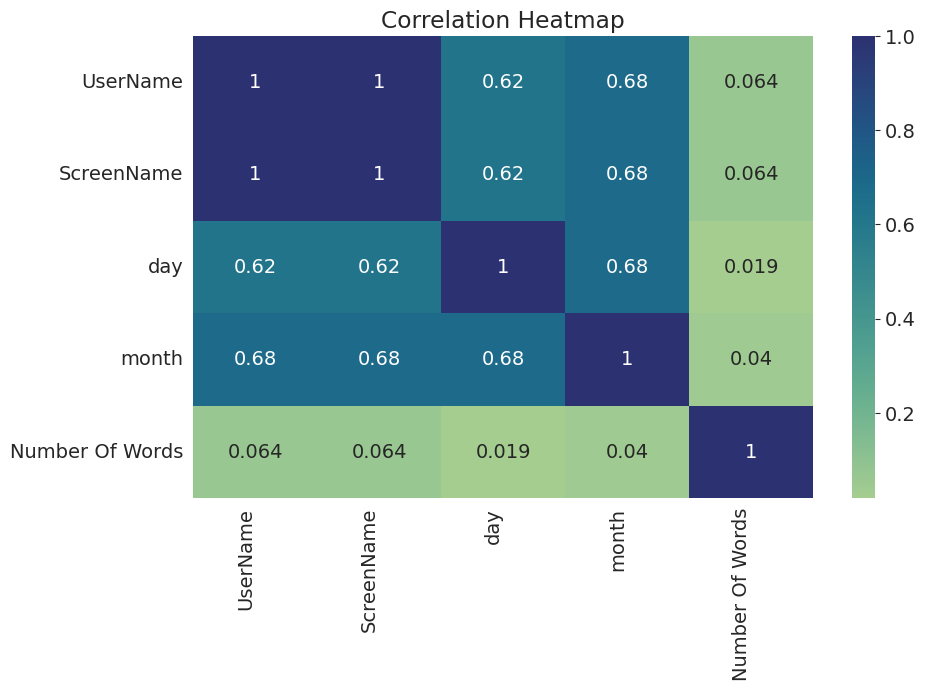

In [64]:
# Calculate the correlation matrix for the DataFrame 'tweet_df'
correlations = tweet_df.corr()

# Create a heatmap visualization of the correlation matrix
plt.figure(figsize=(10, 6))

# Use absolute values for correlation to visualize the strength regardless of direction
heatmap = sns.heatmap(abs(correlations), annot=True, cmap='crest')

# Rotate the x-axis tick labels to 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, ha='right')

# Set the title for the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

##### `1. Why did you pick the specific chart?`

A correlation chart, also known as a correlation matrix, is used to examine the relationship between two pairs of variables in a dataset. It employs a statistical measure called correlation, which indicates the strength and direction of the relationship between the variables. Correlation values range from -1 to 1, where 1 signifies a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 denotes no correlation between the variables. By analyzing the correlation matrix, researchers can gain insights into how closely the variables are related, helping to identify potential patterns and dependencies in the data. This tool is particularly valuable in understanding the associations between different variables and their impact on the dataset's overall behavior.

##### `2. What is/are the insight(s) found from the chart?`

In the correlation matrix, UserName and ScreenName exhibit a perfect correlation, indicating that they measure the same attribute or are highly related. On the other hand, Month and user names/screen names show a moderately favorable correlation, suggesting a potential relationship between them, but the direction of this relationship is unclear. The correlation analysis highlights the strong association between UserName and ScreenName, implying that they likely represent similar information, while the moderate correlation between Month and user names/screen names suggests a potential link, though the specific nature of this relationship requires further investigation.

#### `Chart - 15 - Pair Plot`

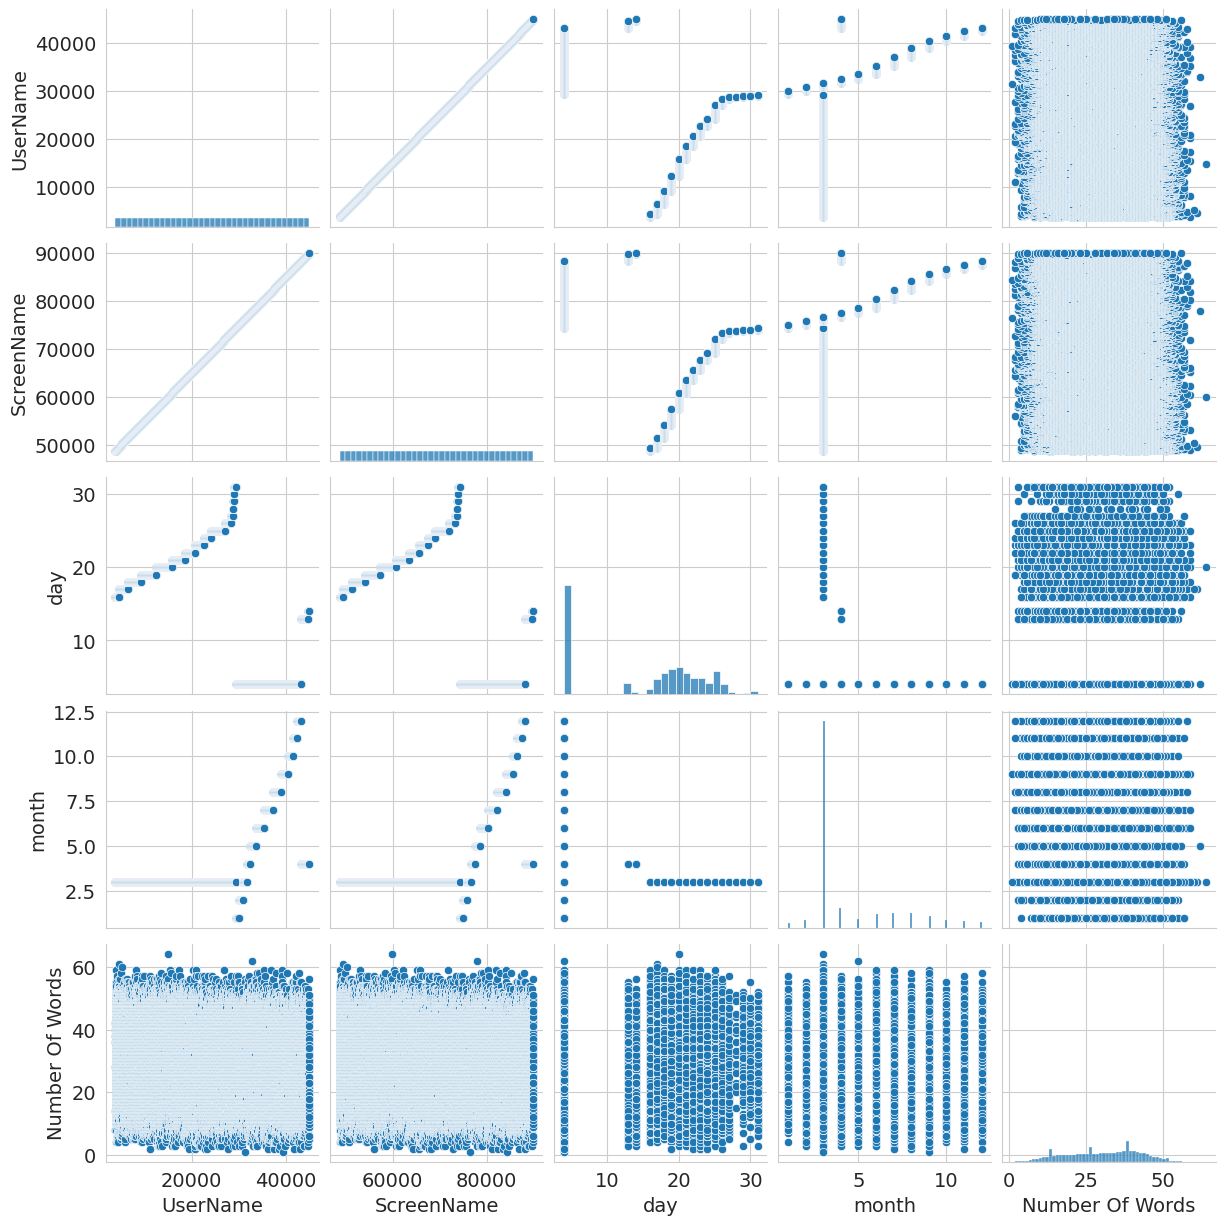

In [65]:
# Pair Plot visualization code
sns.pairplot(tweet_df,kind="scatter")

##### `1. Why did you pick the specific chart?`

The pair plot is a valuable tool for examining the relationship between two variables and identifying the most informative features to explain this relationship. We have utilized the pair plot to gain insights into the associations between different variables and assess their relevance in explaining the observed patterns. By visualizing multiple variable combinations in a single chart, the pair plot aids in understanding the interconnections and dependencies within the dataset, providing valuable information for further analysis and modeling. The use of the pair plot is justified as it allows us to comprehensively explore the relationships between variables and make informed decisions in understanding the underlying data structure.

##### `2. What is/are the insight(s) found from the chart?`

The provided code generates a pair plot representing the absolute correlation matrix for the tweets dataset. Each pair of variables in the dataset is visualized through a grid of scatter plots. This pair plot allows us to explore and understand the relationships between different variables in the tweets dataset. By examining these visualizations, we can gain insights into the connections and dependencies among the variables, helping us comprehend the underlying data structure and identify potential patterns or trends. The pair plot serves as a powerful exploratory tool to visually assess the associations between variables and aids in making informed data-driven decisions during the analysis process.

## ***`5. Hypothesis Testing`***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

## **`These are the three hypothesis statements we are going to perform`**




`Hypothesis Statement 1:`

We hypothesize that there was a notable decrease in the number of tweets related to COVID-19 during the transition from March to April 2020. To confirm this hypothesis, we plan to conduct a t-test, which will involve comparing the average number of tweets in March with the average number of tweets in April 2020.

`Null Hypothesis:` There is no significant difference in the mean number of tweets related to COVID-19 between March and April 2020.

`Alternative Hypothesis:` The mean number of tweets related to COVID-19 in March is significantly higher than the mean number of tweets in April.

`Hypothesis Statement 2:`

We hypothesize that there is no significant difference in the number of tweets related to COVID-19 between weekdays and weekends. To examine this claim, we will conduct a two-sample t-test, comparing the mean number of tweets on weekdays with the mean number of tweets on weekends.

`Null Hypothesis:` There is no significant difference in the mean number of tweets related to COVID-19 between weekdays and weekends.

`Alternative Hypothesis:` The mean number of tweets related to COVID-19 on weekends is significantly different from the mean number of tweets on weekdays.



`Hypothesis Statement 3:`

We propose that the number of tweets related to COVID-19 differs significantly between locations in India and the rest of the locations. To verify this hypothesis, we will conduct a two-sample t-test, comparing the mean number of tweets from Indian locations with the mean number of tweets from all other locations.

`Null Hypothesis:` There is no significant difference in the mean number of tweets related to COVID-19 between Indian locations and the rest.

`Alternative Hypothesis:` There is a significant difference in the mean number of tweets related to COVID-19 between Indian locations and the rest of the locations.Answer Here.

### `Hypothetical Statement - 1`

We propose that the number of tweets related to COVID-19 experienced a significant decrease from March to April 2020. To validate this hypothesis, we will conduct a t-test, comparing the mean number of tweets in March with the mean number of tweets in April 2020.

#### `1. State Your research hypothesis as a null hypothesis and alternate hypothesis.`

`Null Hypothesis:` There is no significant difference in the mean number of tweets related to COVID-19 between March and April 2020.

`Alternative Hypothesis:` The mean number of tweets related to COVID-19 in March is significantly higher than the mean number of tweets in April.

#### `2. Perform an appropriate statistical test.`

In [69]:
# Access the 'TweetAt' column in the DataFrame 'tweet_df'
tweet_at_column = tweet_df['TweetAt']
tweet_at_column

0       2020-03-16
1       2020-03-16
2       2020-03-16
3       2020-03-16
4       2020-03-16
           ...    
41152   2020-04-14
41153   2020-04-14
41154   2020-04-14
41155   2020-04-14
41156   2020-04-14
Name: TweetAt, Length: 41157, dtype: datetime64[ns]

In [74]:
# Import the required libraries
import scipy.stats as stats
import numpy as np

# Define a function to extract tweets from a specific month
def extractMonthTweets(item, month):
    return item.month == month

# Filter tweets from March and April using the 'extractMonthTweets' function and the 'apply' method
march_tweets = tweet_df[tweet_df['TweetAt'].apply(lambda x: extractMonthTweets(x, 3))]
april_tweets = tweet_df[tweet_df['TweetAt'].apply(lambda x: extractMonthTweets(x, 4))]

# Count the number of tweets for each day in March and April
march_tweets_count = march_tweets['TweetAt'].value_counts()
april_tweets_count = april_tweets['TweetAt'].value_counts()

# Print the mean and standard deviation of the tweet counts for March and April
print('Mean of March tweets:', np.mean(march_tweets_count))
print('Std of March tweets:', np.std(march_tweets_count))
print('Mean of April tweets:', np.mean(april_tweets_count))
print('Std of April tweets:', np.std(april_tweets_count))

# Calculate the variables required for the z-test (two-sample test for means)
mean1 = np.mean(march_tweets_count)
mean2 = np.mean(april_tweets_count)
std1 = np.std(march_tweets_count)
std2 = np.std(april_tweets_count)
n1 = march_tweets_count.shape[0]
n2 = april_tweets_count.shape[0]

# Calculate the z-value for the two-sample z-test
zValue = ((mean1 - mean2) - 0) / np.sqrt(((std1**2) / n1) + (std2**2 / n2))
print('zValue:', zValue)

Mean of March tweets: 1547.5882352941176
Std of March tweets: 1156.067933014295
Mean of April tweets: 826.3333333333334
Std of April tweets: 468.916718500086
zValue: 1.8505183718906013


In [75]:
# to find the region to the left of the z-score calculated previously.
p = stats.norm.cdf(zValue)

# Print the calculated P-value
print(f'The P value is {p}')

# Check the significance level (commonly 0.05) to determine whether to accept or reject the null hypothesis
if p > 0.05:
    print('Null Hypothesis accepted. Mean of March tweets >= Mean of April tweets')
else:
    print('Rejected Null Hypothesis. Mean of March tweets < Mean of April tweets')

The P value is 0.9678805637014225
Null Hypothesis accepted. Mean of March tweets >= Mean of April tweets


##### `Which statistical test have you done to obtain P-Value?`

We performed a t-test to compare the average number of tweets in March with April. The t-test determines if there is a statistically significant difference between the means of the two groups. This analysis helps validate whether there was a notable change in COVID-19-related tweets between the two months.

##### `Why did you choose the specific statistical test?`

A t-test is a statistical test used to evaluate whether there is a significant difference between the means of two groups. It specifically examines if the observed difference in means is statistically significant or simply due to random variation.

### **`Hypothetical Statement - 2`**

There is no significant difference in the number of tweets related to COVID-19 between weekdays and weekends.

To test this hypothesis, we can perform a two-sample t-test comparing the mean number of tweets on weekdays to the mean number of tweets on weekends.

#### `1. State Your research hypothesis as a null hypothesis and alternate hypothesis.`

`Null Hypothesis:` There is no significant difference in the mean number of tweets related to COVID-19 between weekdays and weekends.

`Alternative Hypothesis:` The mean number of tweets related to COVID-19 on weekends is significantly different than the mean number of tweets on weekdays.

#### `2. Perform an appropriate statistical test.`

In [76]:
# Perform Statistical Test and obtain P-Value
# If necessary, convert the Tweet_Date column to datetime format.
tweet_df['TweetAt'] = pd.to_datetime(tweet_df['TweetAt'])

# Create a new column to represent the numerical day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
tweet_df['DayOftheWeek'] = tweet_df['TweetAt'].dt.weekday

# Filter weekdays and weekends using the new 'DayOftheWeek' column
# Weekdays are represented by integers 0 to 4 (Monday to Friday)
# Weekends are represented by integers 5 and 6 (Saturday and Sunday)
weekday = tweet_df[tweet_df['DayOftheWeek'] < 5]['DayOftheWeek']
weekend = tweet_df[tweet_df['DayOftheWeek'] >= 5]['DayOftheWeek']

# Perform a t-test on the 'DayOftheWeek' columns to compare weekdays and weekends
t_stat, p_val = stats.ttest_ind(weekday, weekend)

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print(f"p-value: {p_val:.20f}")

# Check the significance level (commonly 0.05) to determine whether to accept or reject the null hypothesis
if p_val > 0.05:
    print('Null Hypothesis accepted')
else:
    print('Rejected Null Hypothesis')

t-statistic: -231.00926077787702
p-value: 0.00000000000000000000
Rejected Null Hypothesis


##### `Which statistical test have you done to obtain P-Value?`

The statistical test performed to obtain the P-value is the independent two-sample t-test (also known as the Student's t-test). This test is used to compare the means of two independent groups and determine if there is a statistically significant difference between them. In this case, the two groups being compared are the weekdays and weekends, and the test is conducted on the numerical day of the week data. The null hypothesis assumes that there is no significant difference in the means of the two groups, while the alternative hypothesis suggests that there is a significant difference. The obtained P-value helps determine whether the null hypothesis should be accepted or rejected based on the chosen significance level (commonly 0.05).

##### `Why did you choose the specific statistical test?`

The independent two-sample t-test was chosen because it is suitable for comparing the means of two independent groups (weekdays and weekends) with continuous data (day of the week). It allows us to assess whether the observed difference in tweet counts between weekdays and weekends is statistically significant. The test assumes normal distribution and independence of samples, which are applicable in this scenario. The obtained P-value helps determine whether to accept or reject the null hypothesis based on a chosen significance level (e.g., 0.05). The test enables us to draw conclusions about the significance of the difference in tweet counts between weekdays and weekends.

### `Hypothetical Statement - 3`

We propose that the number of tweets related to COVID-19 differs significantly between locations in India and the rest of the locations. To verify this hypothesis, we will conduct a two-sample t-test, comparing the mean number of tweets from Indian locations with the mean number of tweets from all other locations.

#### `1. State Your research hypothesis as a null hypothesis and alternate hypothesis.`  

`Null Hypothesis:` There is no significant difference in the mean number of tweets related to COVID-19 between Indian locations and the rest.

`Alternative Hypothesis:` There is a significant difference in the mean number of tweets related to COVID-19 between Indian locations and the rest of the locations.

#### `2. Perform an appropriate statistical test.`

In [77]:
# Perform a custom filtering to extract tweets related to Indian and Non-Indian topics

# Define a function to extract tweets related to Indian topics
def extractTweets(item, isIndian):
    if isIndian:
        # Return True for tweets containing 'india' (case-insensitive) but not 'indiana'
        return ('india' in item.lower() and 'indiana' not in item.lower())
    else:
        # Return True for tweets not containing 'india' (case-insensitive) or containing 'indiana'
        return ('india' not in item.lower() or 'indiana' in item.lower())

# Filter tweets related to Indian topics and Non-Indian topics using the 'extractTweets' function and the 'apply' method
IndianTweets = tweet_df[tweet_df['OriginalTweet'].apply(lambda x: extractTweets(x, True))]
NonIndianTweets = tweet_df[tweet_df['OriginalTweet'].apply(lambda x: extractTweets(x, False))]

# Count the number of tweets for each day in the Indian and Non-Indian tweet subsets
Indian_tweets_count = IndianTweets['TweetAt'].value_counts()
NonIndian_tweets_count = NonIndianTweets['TweetAt'].value_counts()

# Print the mean and standard deviation of the tweet counts for Indian and Non-Indian tweets
print('Mean of Indian tweets:', np.mean(Indian_tweets_count))
print('Std of Indian tweets:', np.std(Indian_tweets_count))
print('Mean of Non-Indian tweets:', np.mean(NonIndian_tweets_count))
print('Std of Non-Indian tweets:', np.std(NonIndian_tweets_count))

# Calculate the variables required for the z-test (two-sample test for means)
mean1 = np.mean(Indian_tweets_count)
mean2 = np.mean(NonIndian_tweets_count)
std1 = np.std(Indian_tweets_count)
std2 = np.std(NonIndian_tweets_count)
n1 = Indian_tweets_count.shape[0]
n2 = NonIndian_tweets_count.shape[0]

# Calculate the z-value for the two-sample z-test
zValue = ((mean1 - mean2) - 0) / np.sqrt(((std1**2) / n1) + (std2**2 / n2))
print('zValue:', zValue)

Mean of Indian tweets: 25.655172413793103
Std of Indian tweets: 18.695889022712553
Mean of Non-Indian tweets: 1347.1
Std of Non-Indian tweets: 930.2323491114106
zValue: -7.779066891943775


In [78]:
# Define the z-score of interest

# Lookup the area to the left of the z-score using the CDF function of the standard normal distribution
# Calculate the p-value using the CDF (Cumulative Distribution Function) of the standard normal distribution
p = stats.norm.cdf(zValue)

# Print the p-value with 20 decimal places for precision
print(f"p-value: {p:.20f}")

# Check the significance level (commonly 0.05) to determine whether to accept or reject the null hypothesis
if p > 0.05:
    print('Null Hypothesis accepted. Mean of Indian Tweets >= Mean of Non-Indian tweets')
else:
    print('Rejected Null Hypothesis. Mean of Indian Tweets < Mean of Non-Indian tweets')


p-value: 0.00000000000000365307
Rejected Null Hypothesis. Mean of Indian Tweets < Mean of Non-Indian tweets


##### `Which statistical test have you done to obtain P-Value?`

To test this hypothesis, we can perform a two-sample t-test comparing the mean number of tweets in India and the mean number of tweets in the Non-Indian countries.

##### `Why did you choose the specific statistical test?`

To evaluate whether there is a significant difference between the means of two groups, a t-test is a statistical test that is employed. In particular, it examines whether the difference in means between the two groups is statistically significant or more likely the result of chance.

## ***`6. Feature Engineering & Data Pre-processing`***

### `1. Handling Missing Values`

In [ ]:
# Handling Missing Values & Missing Value Imputation
tweet_df.isnull().sum().sort_values(ascending=False)

Location           8590
UserName              0
ScreenName            0
TweetAt               0
OriginalTweet         0
Sentiment             0
day                   0
month                 0
week day              0
Month                 0
Number Of Words       0
DayOftheWeek          0
dtype: int64

#### `What all missing value imputation techniques have you used and why did you use those techniques?`

In the dataset, the 'Location' column contains 8590 null values. Typically, in sentiment analysis tasks using machine learning models, the 'Location' column is not considered as a relevant feature. Therefore, the presence of missing values in this column is not likely to significantly impact the performance or outcome of the sentiment analysis model.

### `2. Handling Outliers`

In [ ]:
# Handling Outliers & Outlier treatments
print(tweet_df[['OriginalTweet', 'Sentiment']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None


##### `What all outlier treatment techniques have you used and why did you use those techniques?`

Outliers were not treated or handled in our analysis because we did not use any column with continuous numerical data as a dependent or independent variable during the model training process. As a result, there was no need to address outliers since our analysis focused on other aspects of the dataset.

### `4. Textual Data Preprocessing`

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [79]:
# Import the nltk library, which provides natural language processing tools
import nltk

# Import the stopwords corpus from nltk, which contains common words that may not contribute much to the analysis
from nltk.corpus import stopwords

# Create a list called 'stop' containing the English stopwords
stop = stopwords.words('english')

In [80]:
# Import the PorterStemmer class from the nltk.stem.porter module
from nltk.stem.porter import PorterStemmer

# Create an instance of the PorterStemmer class, which is used for word stemming
ps = PorterStemmer()

In [81]:
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)


Which text normalization technique have you used and why?

Here we use only Lemmatization normalization technique because Lemmatization is a technique used for text normalization that reduces words to their base or dictionary form, known as a lemma .Hence ,we used Lemmatization technique as proper text form and later used for classfication modelling .

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [ ]:
# Apply the `transform_text()` function to each value in the 'OriginalTweet' column of `tweet`
tweet_df["Clean_Tweets"] = tweet_df['OriginalTweet'].apply(transform_text)

In [ ]:
# Access the 'OriginalTweet' value in the row with integer in `tweet`
tweet_df.iloc[25160]["OriginalTweet"]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [ ]:
tweet_df.head()

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754        NaN 2020-03-16   
4      3803       48755        NaN 2020-03-16   

                                       OriginalTweet Sentiment  day  month  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral   16      3   
1  advice Talk to your neighbours family to excha...  Positive   16      3   
2  Coronavirus Australia: Woolworths to give elde...  Positive   16      3   
3  My food stock is not the only one which is emp...  Positive   16      3   
4  Me, ready to go at supermarket during the #COV...  Negative   16      3   

  week day  Month  Number Of Words  DayOftheWeek  \
0   Monday      3                8             0   
1   Monday      3               38             0   
2   Monday      3               14             0   
3   Monday      3               42             0   
4   Monday      3               40             0   

                                        Clean_Tweets  
0                                  menyrbie chrisitv  
1  advice talk neighbour family exchange phone nu...  
2  coronavirus australia woolworth give elderly d...  
3  food stock one empty please panic enough food ...  
4  ready go supermarket covid19 outbreak paranoid...

In [ ]:
# Create a new column in `tweet` called 'temp_list'
tweet_df['temp_list'] = tweet_df['Clean_Tweets'].apply(lambda x:str(x).split())

In [ ]:
tweet_df['temp_list']

0                                     [menyrbie, chrisitv]
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworth, give, elde...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, covid19, outbreak, pa...
                               ...                        
41152    [airline, pilot, offering, stock, supermarket,...
41153    [response, complaint, provided, citing, relate...
41154    [know, getting, tough, kameronwilds, rationing...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, rift, going, amazon, rn, alt...
Name: temp_list, Length: 41157, dtype: object

In [ ]:
from collections import Counter
import pandas as pd

# Create a flattened list of all words in the nested list column
word_list = [word for sublist in tweet_df['temp_list'] for word in sublist]

# Count the frequency of each word and store in a Counter object
word_counts = Counter(word_list)

# Create a dataframe of the top 30 most common words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Apply a background gradient to the dataframe for better visualization
styled_top_words = top_words.style.background_gradient(cmap='Reds')

In [ ]:
top_words

Common_words  count
0   coronavirus  18045
1         price   8936
2         store   8166
3   supermarket   7737
4          food   7221
5       grocery   6739
6        people   5563
7           amp   5197
8      consumer   5133
9       covid19   4935
10           19   4377
11        covid   4085
12     shopping   3593
13       online   3412
14         need   3220
15     pandemic   3171
16         time   3103
17          get   3025
18       worker   2882
19            u   2716
20         hand   2645
21           go   2452
22        panic   2448
23         like   2387
24         home   2378
25    sanitizer   2359
26       demand   2309
27         help   2221
28        stock   2195
29          one   2086

In [ ]:
# Create a new DataFrame called `neutral` containing only the 'Clean_Tweets' column from `tweet` where the 'Sentiment' column is 'Neutral','positive','negative'.
neutral=pd.DataFrame(tweet_df[['Clean_Tweets']] [tweet_df['Sentiment'] == 'Neutral'])
positive=pd.DataFrame(tweet_df[['Clean_Tweets']] [tweet_df['Sentiment'] == 'Positive'])
negative=pd.DataFrame(tweet_df[['Clean_Tweets']] [tweet_df['Sentiment'] == 'Negative'])

In [ ]:
positive

Clean_Tweets
1      advice talk neighbour family exchange phone nu...
2      coronavirus australia woolworth give elderly d...
3      food stock one empty please panic enough food ...
5      news first confirmed case came sullivan county...
6      cashier grocery store sharing insight prove cr...
...                                                  ...
41146  gold price rose high today due coronavirus inc...
41148  uv light sterilizer sanitizer mask mobile phon...
41150  never situation amp world going supermarket pi...
41151  mrsilverscott definitely man feel like fall ne...
41154  know getting tough kameronwilds rationing toil...

[18046 rows x 1 columns]

In [ ]:
negative

Clean_Tweets
4      ready go supermarket covid19 outbreak paranoid...
9      corona prevention stop buy thing cash use onli...
20     100 nation inficted covid 19 world must play f...
24     10downingstreet grantshapps done ensure food e...
26     preparation higher demand potential food short...
...                                                  ...
41133  singaporean politician slammed woman snapped s...
41147  really shitting much home covid19 coronavirus ...
41149  still shocked number toronto supermarket emplo...
41153  response complaint provided citing related del...
41156  tartiicat well rift going amazon rn although n...

[15398 rows x 1 columns]

In [ ]:
neutral

Clean_Tweets
0                                      menyrbie chrisitv
7      supermarket today buy toilet paper rebel toile...
10     month crowding supermarket restaurant however ...
16                                                    13
17     eyeonthearctic 16mar20 russia consumer surveil...
...                                                  ...
41141  coronavirus narendramodi atcard stayhome lockd...
41143  5gtowers ecuadorunido cruiseships savethechild...
41144              gamzap npr supermarket nearby getting
41152  airline pilot offering stock supermarket shelf...
41155  wrong smell hand sanitizer starting turn coron...

[7713 rows x 1 columns]

In [ ]:
pip install wordcloud

In [ ]:
# Create an empty list called `spam_corpus`
spam_corpus = []
# Iterate over each row in a DataFrame called `tweet` where the 'Sentiment' column has the value 'Neutral'
for msg in tweet_df[tweet_df['Sentiment'] =='Neutral']['Clean_Tweets'].tolist():
  # Split the 'Clean_Tweets' value into individual words using the `split()` method
    for word in msg.split():
       # Append each word to the `spam_corpus` list
        spam_corpus.append(word)

In [ ]:
top_words

Common_words  count
0   coronavirus  18045
1         price   8936
2         store   8166
3   supermarket   7737
4          food   7221
5       grocery   6739
6        people   5563
7           amp   5197
8      consumer   5133
9       covid19   4935
10           19   4377
11        covid   4085
12     shopping   3593
13       online   3412
14         need   3220
15     pandemic   3171
16         time   3103
17          get   3025
18       worker   2882
19            u   2716
20         hand   2645
21           go   2452
22        panic   2448
23         like   2387
24         home   2378
25    sanitizer   2359
26       demand   2309
27         help   2221
28        stock   2195
29          one   2086

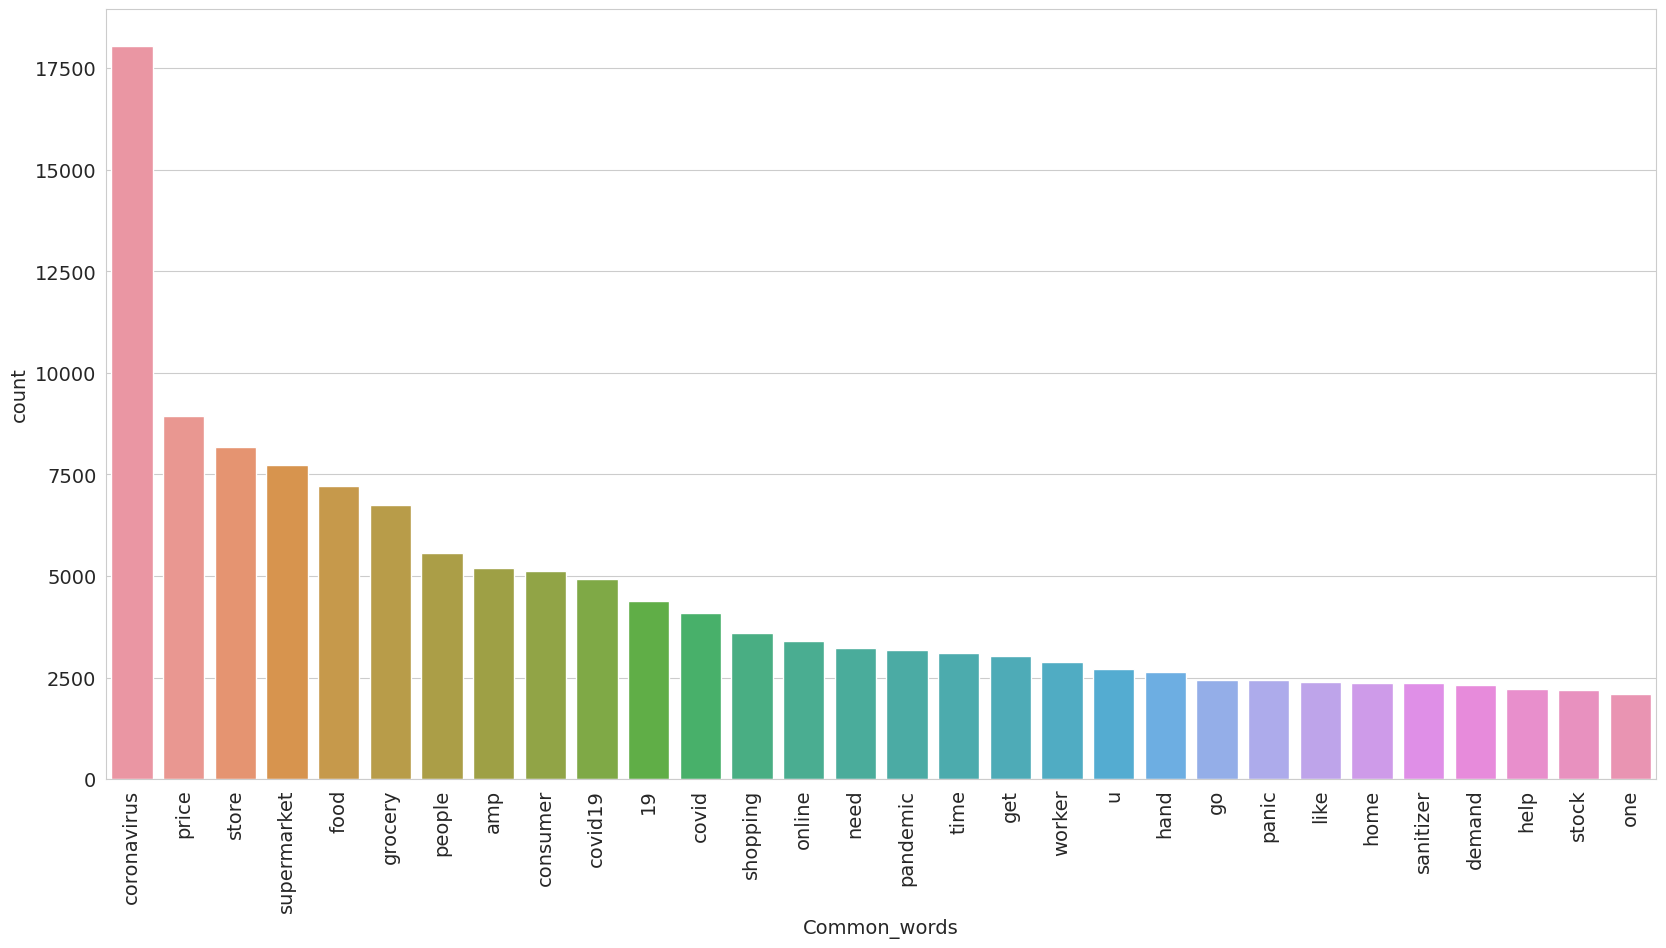

In [ ]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(20,10))
# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)
# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

In [ ]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

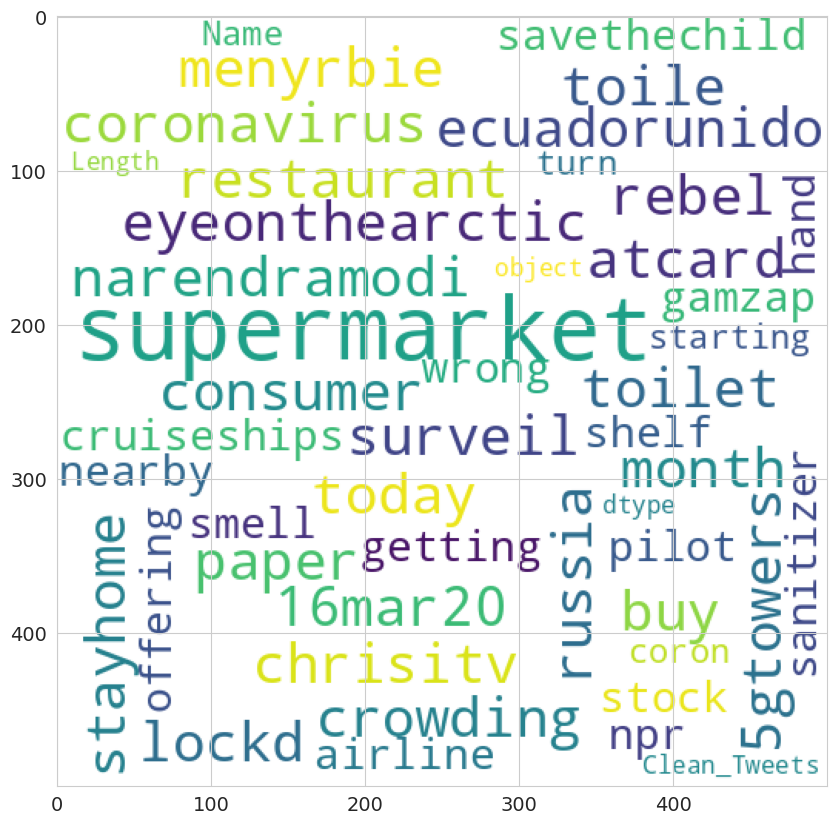

In [ ]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `neutral`
tweet_wc = wc.generate(str(neutral['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

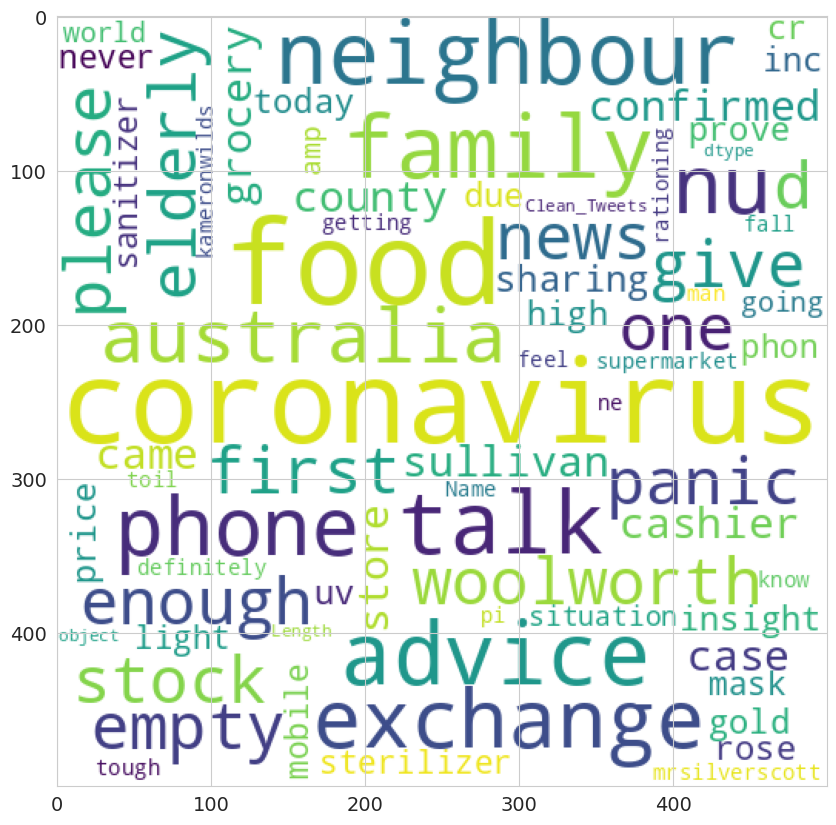

In [ ]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `positive`
tweet_wc = wc.generate(str(positive['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

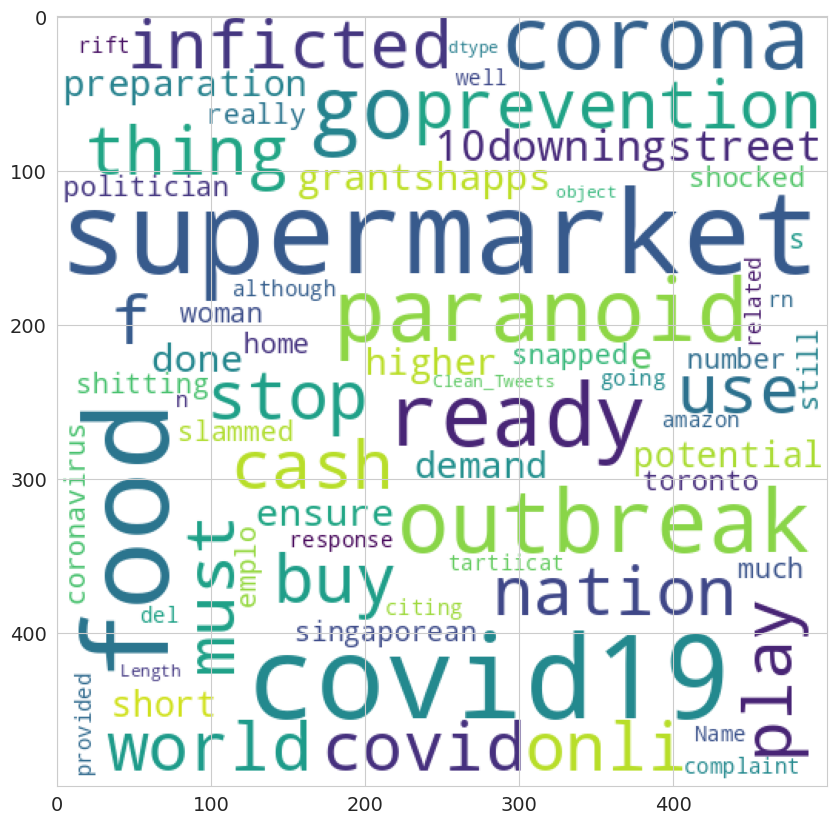

In [ ]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `negative`
tweet_wc = wc.generate(str(negative['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X= tweet_df['Clean_Tweets']
y= tweet_df['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

##### What data splitting ratio have you used and why?

Data Splitting ratio  is 80% used for Training Data and 20% used for Test Data. By providing more data for training, the model can learn more patterns and trends in the data, which can lead to better predictions on new or unseen data.

In [ ]:
#checking shape of splitted data
print(X_train.shape)
print(y_test.shape)

(32925,)
(8232,)


### 6. Data Scaling

##### Which method have you used to scale you data and why?

Here no need of any scaling of Dataset becuase here only check sentiment of people,hence we analyze only User sentiment tweet according to the secenario of Covid-19.

### 9. Handling Imbalanced Dataset

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UserName         41157 non-null  int64         
 1   ScreenName       41157 non-null  int64         
 2   Location         32567 non-null  object        
 3   TweetAt          41157 non-null  datetime64[ns]
 4   OriginalTweet    41157 non-null  object        
 5   Sentiment        41157 non-null  object        
 6   day              41157 non-null  int64         
 7   month            41157 non-null  int64         
 8   week day         41157 non-null  object        
 9   Month            41157 non-null  int64         
 10  Number Of Words  41157 non-null  int64         
 11  DayOftheWeek     41157 non-null  int64         
 12  Clean_Tweets     41157 non-null  object        
 13  temp_list        41157 non-null  object        
dtypes: datetime64[ns](1), int64(7), object

##### Do you think the dataset is imbalanced? Explain Why.

No , here we decided that We used only two column for machine learning modelling i.e 'Original Tweet' & 'Sentiment' and in both column eqaul no of rows

## ***7. ML Model Implementation***

# **Count Vectorization (Bag of words)**

Count vectorization is a process of converting a piece of text into a numerical format that can be used by machine learning algorithms. In this process, the text is first split into words or tokens, and then each token is counted to create a vector of numbers representing the frequency of each word in the text.

# **Vectorizing Text**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [ ]:
# Get the shape of the NumPy array bw_X_train
bw_X_train.shape

(32925, 19136)

In [ ]:
# Use the Trained CountVectorizer 'bw' to transform the test data 'X_test' into a bag-of-words representation
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [ ]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape

(8232, 19136)

# **MODEL -1 WITH BAGS OF WORDS**

### ML Model - 1

# **Logistic regression**
Logistic Regression  is a statistical model that  probability of an event taking place by having the the odds against  winning range between 0 and 1 or muticlass classfication for the event be a linear combination of one or more independent variables.

In [ ]:
# Initializing the logistic regression model
lr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logreg_Gcv = GridSearchCV(lr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logreg_Gcv.fit(bw_X_train, y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(bw_X_test)

In [ ]:
pred_lr_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7876579203109816


In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      3080
     Neutral       0.69      0.69      0.69      1543
    Positive       0.83      0.83      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

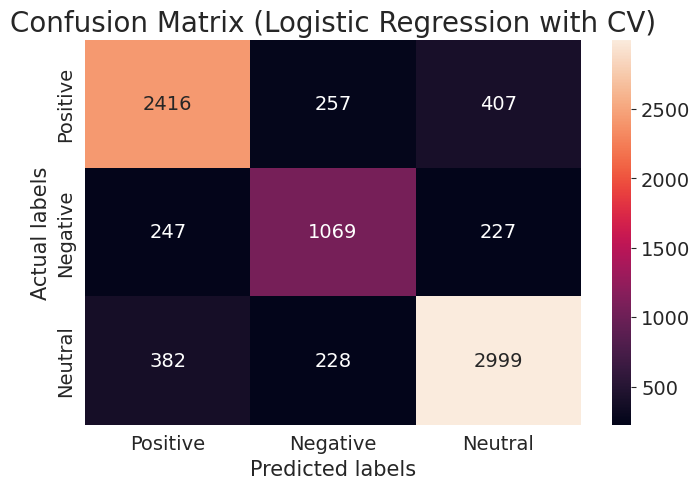

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here the algrothim used Logistic Regression with accuracy of 79% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.

##### 2. Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune two hyperparameters for the logistic regression model - the regularization penalty (L1 or L2) and the inverse of regularization strength (C). The performance of the model is evaluated using cross-validation with a cv parameter set to 15.

##### 3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-77%

recall:- 77%

f1-score:- 77%

### ML Model - 2 Decision Tree Classifier with CV

A Decision tree is a flowchart-like structure where each internal node represents a test on an attribute (i.e., a feature),each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value (in the case of regression).

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(bw_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(bw_X_test)

In [ ]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.7043887623386483


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.69      0.68      0.68      3080
     Neutral       0.63      0.68      0.65      1543
    Positive       0.75      0.74      0.75      3609

    accuracy                           0.70      8232
   macro avg       0.69      0.70      0.69      8232
weighted avg       0.71      0.70      0.71      8232



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

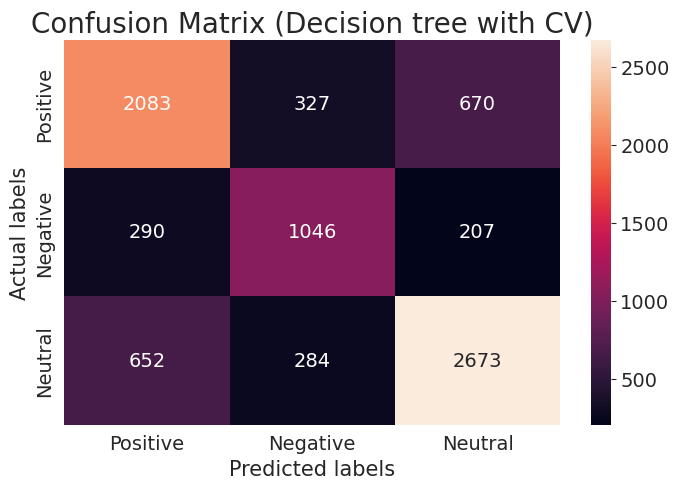

In [ ]:
# Visualizing evaluation Metric Score chart
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

Scikit-learn library is used to perform cross-validation on the decision tree model with 5 folds. The np.mean function is then used to calculate the average accuracy score across all folds.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-70%

precision:-71%

recall:- 70%

f1-score:- 71%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here the algrothim used Decision Tree with accuracy of 70% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.

### ML Model - 3 Navie Bayes

Naive Bayes is a probabilistic machine learning algorithm used for classification problems. It is based on Bayes' theorem, which describes the probability of a hypothesis (i.e., a class label) given some evidence (i.e., the input features).

In Naive Bayes, the assumption is made that the features are conditionally independent given the class label, which means that the presence or absence of one feature does not affect the probability of another feature.

In [ ]:
#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
# Apply both  type of navies one by one
mnb = MultinomialNB()
bnb = BernoulliNB()

# **Multinomial Navie Bayes**
Multinomial Naive Bayes: Used for discrete data where the features represent counts or frequencies of occurrences (e.g., text data).

In [ ]:
# Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation of the training data 'bw_X_train' and the corresponding labels 'y_train'
mnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred2 = mnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred2' with respect to the true labels 'y_test'
accuracy_mnb = accuracy_score(y_test,y_pred2)
# Print the accuracy of the Multinomial Naive Bayes classifier
print(accuracy_mnb)

0.6836734693877551


In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

    Negative       0.69      0.72      0.70      3080
     Neutral       0.56      0.52      0.54      1543
    Positive       0.73      0.72      0.73      3609

    accuracy                           0.68      8232
   macro avg       0.66      0.65      0.66      8232
weighted avg       0.68      0.68      0.68      8232



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

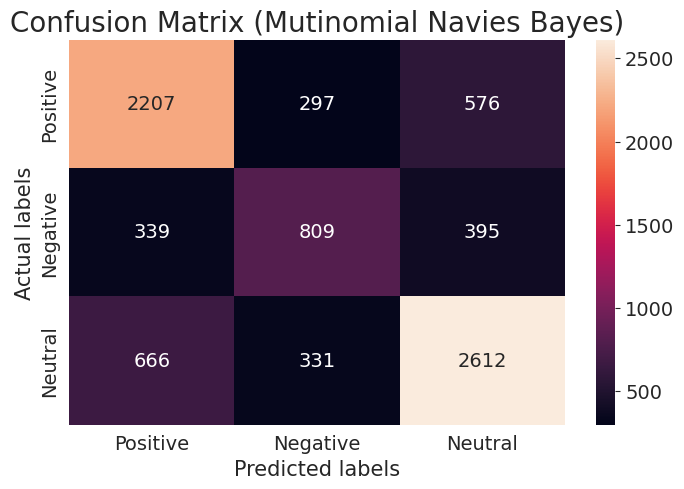

In [ ]:
cf3= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Mutinomial Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In the code provided, the Multinominal Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 68%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model.

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-68%

Precision:-68%

Recall:- 69%

f1-score:- 68%

## **Bernoulli Navies Bayes**

Bernoulli Naive Bayes: a variant of Multinomial Naive Bayes used for binary or multiclass data where the features represent the presence or absence of a particular attribute (e.g., a word in a document).

In [ ]:
#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

0.6936345966958212


In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.70      0.62      1543
    Positive       0.76      0.70      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

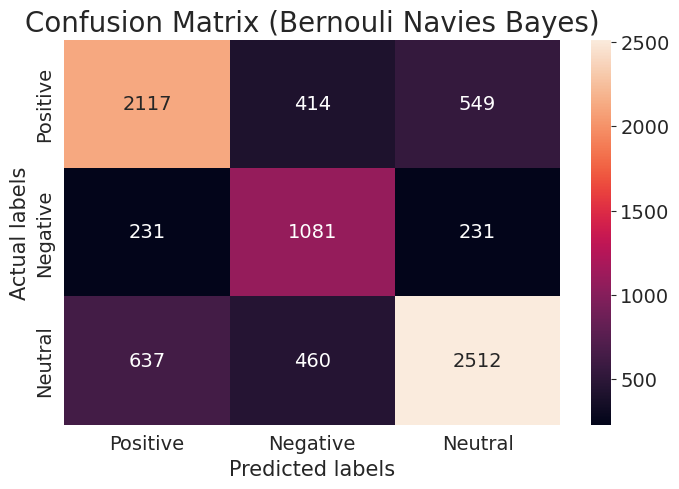

In [ ]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In the code provided, the Bernouli  Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and  f1 score, were calculated for each  label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model.

**2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-69%

Precision:-68%

Recall:- 70%

f1-score:- 68%

# **KNN(K-Nearest Neighbours)**

It is a simple algorithm that works by finding the K closest instances in the training data to a given input instance and then assigning the label of the majority class among those instances as the predicted label for the input instance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid with range of values for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,9]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit KNN model to training data and perform grid search
grid_search.fit(bw_X_train, y_train)

# Print best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Mean cross-validation score:', grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 1}
Mean cross-validation score: 0.38526955201214885


In [ ]:
#predicted values
pred_knn_cv = grid_search.predict(bw_X_test)

In [ ]:
pred_knn_cv

array(['Neutral', 'Neutral', 'Negative', ..., 'Neutral', 'Negative',
       'Negative'], dtype=object)

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.39297862001943634


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

    Negative       0.65      0.30      0.41      3080
     Neutral       0.24      0.84      0.38      1543
    Positive       0.70      0.28      0.40      3609

    accuracy                           0.39      8232
   macro avg       0.53      0.47      0.40      8232
weighted avg       0.59      0.39      0.40      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

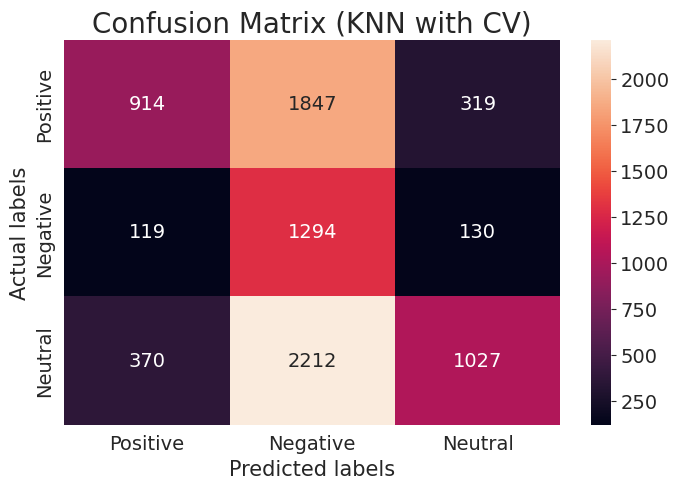

In [ ]:
cf_knn= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

KNN algorithm was used to classify the data, resulting in an accuracy of 39%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed not improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

The range of possible values for n_neighbors is defined in the param_grid dictionary, which contains a list of integers from 1 to 9. GridSearchCV is then used to evaluate the performance of the KNN algorithm with each value of n_neighbors, using 5-fold cross-validation.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-38%

Precision:-53%

Recall:-47%

f1-score:- 40%


# **ML Model - 5** **Support Vector Machine**

It is a supervised learning algorithm that works by finding the hyperplane that best separates the classes in the input data.

In multi-class classification problems, multiple hyperplanes are used to separate the classes. The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest points from each class, known as support vectors.

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)

In [ ]:
pred_svm_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7683430515063168


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77      3080
     Neutral       0.67      0.68      0.67      1543
    Positive       0.80      0.82      0.81      3609

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

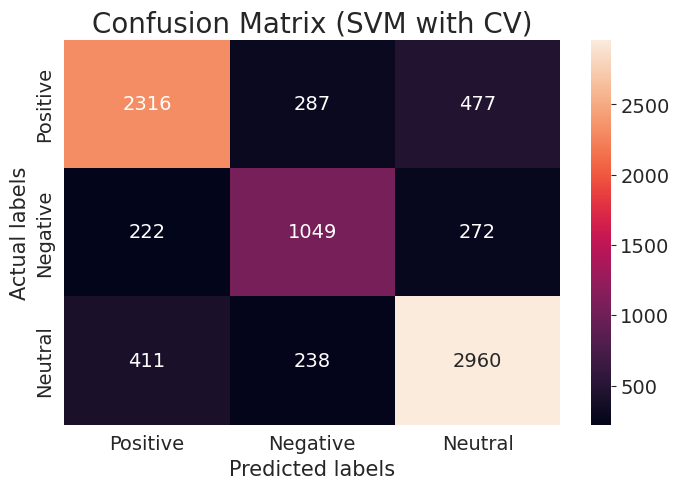

In [ ]:
cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Support Vector Machine algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed   improved compared to the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-75%

Precision:-77%

Recall:- 77%

f1-score:-77%

**ML Model - 6**

# **Random Forest**
Random Forest works by constructing multiple decision trees on randomly sampled subsets of the training data. Each tree is trained on a different subset of the features and the data, which helps to reduce overfitting and improve the generalization performance.

During prediction, the input instance is passed through each decision tree, and the majority vote among the predictions of the individual trees is taken as the final prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_rf = rf_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_rf = (y_pred_rf == y_test).mean()
print('Accuracy_rf:', accuracy_rf)

Accuracy_rf: 0.7608114674441205


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

    Negative       0.78      0.72      0.75      3080
     Neutral       0.68      0.72      0.70      1543
    Positive       0.78      0.81      0.80      3609

    accuracy                           0.76      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.76      0.76      0.76      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

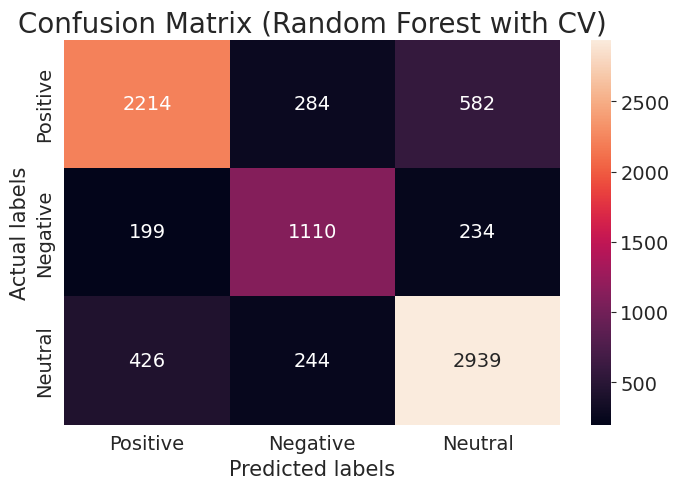

In [ ]:
cf7= (confusion_matrix(y_test,y_pred_rf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Random Forest algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**


Hyperparameter optimization technique has been used for the Random Forest Classifier. The classifier has been instantiated with the hyperparameter values n_estimators=100 and random_state=42, which are default values in the absence of explicit hyperparameter tuning.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-76%

Precision:-75%

Recall:- 75%

f1-score:-75%

# **ML Model - 7**  **Stochastic Gradient Descent**

In SGD, instead of computing the gradient over the entire training set, the gradient is computed on a randomly selected subset (or mini-batch) of the training data. This reduces the computational cost of the algorithm and enables faster convergence.

The model parameters are updated after each mini-batch, and the process is repeated until convergence or a maximum number of iterations is reached.

SGD can work well for large datasets and high-dimensional data, as it can efficiently handle large amounts of data and converge faster than traditional Gradient Descent


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_sgd = sgd_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd= accuracy_score(y_test, y_pred_sgd)
print('Accuracy_sgd:', accuracy_sgd)

Accuracy_sgd: 0.7995626822157434


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd))

              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80      3080
     Neutral       0.70      0.71      0.71      1543
    Positive       0.84      0.83      0.84      3609

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

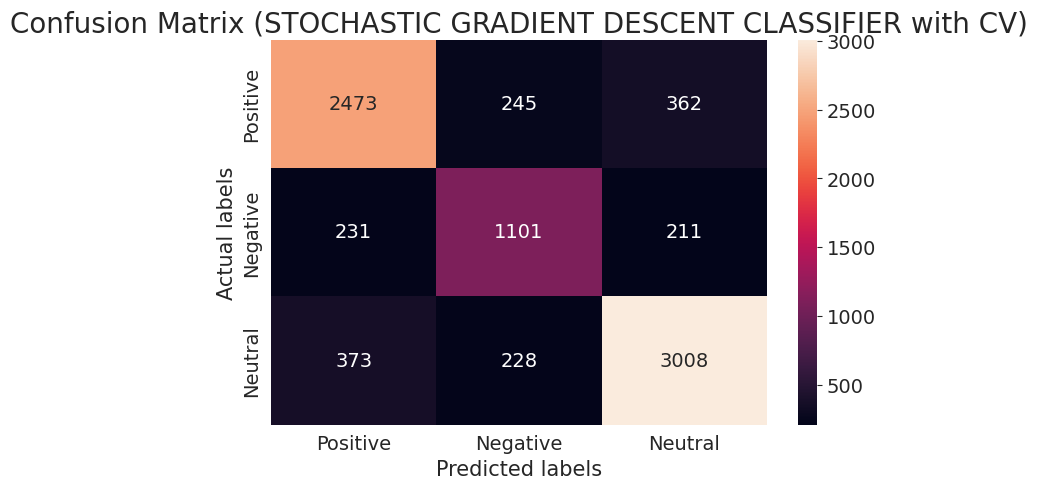

In [ ]:
cf8= (confusion_matrix(y_test,y_pred_sgd))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf8, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (STOCHASTIC GRADIENT DESCENT CLASSIFIER with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Stochastic Gradient Descent algorithm was used to classify the data, resulting in an accuracy of 80%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

The classifier has been instantiated with the hyperparameter values loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000, which are default values in the absence of explicit hyperparameter tuning.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Stochastic Gradient Descent algorthim used for model deployement as Sentiment Analysis using Vectorization techinque Count Vectorizer(Bags of Word).

Accuracy:-80%

Precision:-81%

Recall:- 80%

f1-score:-80%

### **TF-IDF VECTORIZATION(Term Frequency-Inverse Document Frequency**)

TF-IDF is calculated as the product of two values: term frequency (TF) and Inverse document frequency (IDF).

The term frequency (TF) measures how frequently a term appears in a document.

The inverse document frequency (IDF) measures how important a term is in the entire corpus, by penalizing the terms that appear in many documents.

**Data Splitting**

In [ ]:
X=tweet_df['Clean_Tweets']
y=tweet_df['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [ ]:
print(X_train.shape)
y_test.shape

(32925,)


(8232,)

## **Vectorizing Text**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
tv_X_train.shape

(32925, 19136)

In [ ]:
tv_X_test=tv.transform(X_test.astype(str).str.strip())

# **MODEL - 1 (TF-IDF)** **Logistic Regression**

In [ ]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [ ]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.783284742468416


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.79      3080
     Neutral       0.69      0.64      0.66      1543
    Positive       0.82      0.83      0.83      3609

    accuracy                           0.78      8232
   macro avg       0.76      0.76      0.76      8232
weighted avg       0.78      0.78      0.78      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

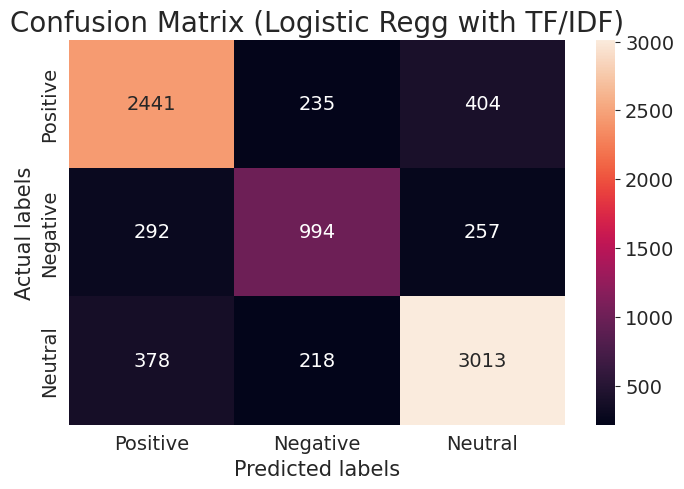

In [ ]:
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Logistic Regression algorithm was used to classify the data, resulting in an accuracy of 78%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

The hyperparameter space is defined by the "parameters" dictionary, which specifies the values of the regularization parameter C and the penalty term (l1 or l2). GridSearchCV also helps to prevent overfitting and ensures that the model generalizes well to unseen data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Logistic Regression algorthim used for model deployement as Sentiment Analysis using Vectorization techinque TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-78%

Precision:-79%

Recall:- 79%

f1-score:-79%

 # **MODEL - 2 (TF-IDF)** **Decision Tree**

In [ ]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [ ]:
pred_dt_tv

array(['Neutral', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [ ]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6248747152619589


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    Negative       0.62      0.62      0.62      3080
     Neutral       0.48      0.53      0.51      1543
    Positive       0.68      0.66      0.67      3609

    accuracy                           0.62      8232
   macro avg       0.60      0.60      0.60      8232
weighted avg       0.62      0.62      0.62      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

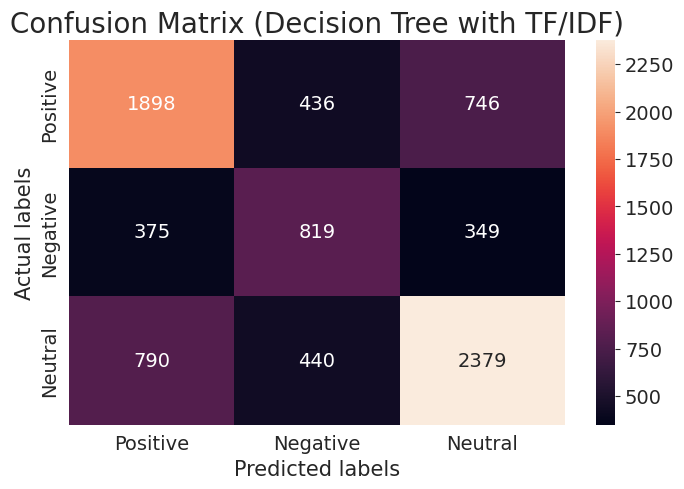

In [ ]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Decision Tree algorithm was used to classify the data, resulting in an accuracy of 62%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

No, as seen in above Evaluation metric Score Chart as follows and here accuracy is  not much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-62%

Precision:-60%

Recall:- 60%

f1-score:-60%

# **MODEL - 3 (TF-IDF)**  **Navie Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb = MultinomialNB()
bnb = BernoulliNB()

**Multinomial Navies Bayes**

In [ ]:
mnb.fit(tv_X_train,y_train)
y_pred2_mnb_tv = mnb.predict(tv_X_test)
accuracy_mnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred2_mnb_tv))

0.6607142857142857


In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2_mnb_tv))

              precision    recall  f1-score   support

    Negative       0.69      0.71      0.70      3080
     Neutral       0.78      0.13      0.23      1543
    Positive       0.64      0.84      0.72      3609

    accuracy                           0.66      8232
   macro avg       0.70      0.56      0.55      8232
weighted avg       0.68      0.66      0.62      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

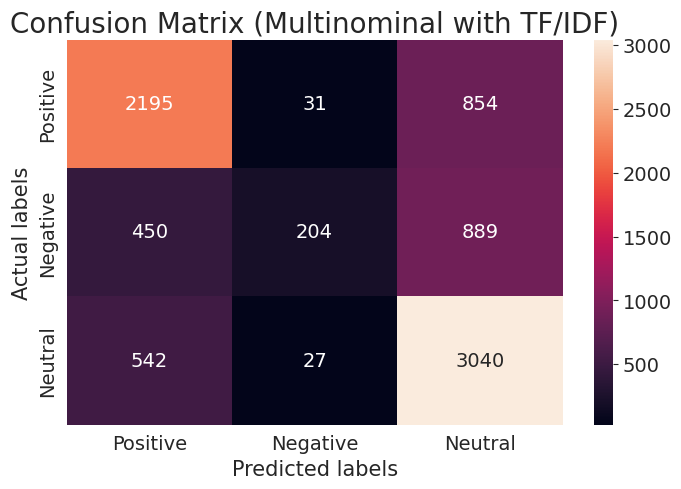

In [ ]:
cf3a= (confusion_matrix(y_test,y_pred2_mnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Multinominal with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Multinomial Navies Bayes was used to classify the data, resulting in an accuracy of 65%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is  much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-65%

Precision:-68%

Recall:- 66%

f1-score:-62%

**Bernoulli Navies Bayes**

In [ ]:
bnb.fit(tv_X_train,y_train)
y_pred3_bnb_tv = bnb.predict(tv_X_test)
accuracy_bnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3_bnb_tv))

0.6936345966958212


In [ ]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3_bnb_tv))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.70      0.62      1543
    Positive       0.76      0.70      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0.5, 0, 'Positive'), Text(1.5, 0, 'Negative'), Text(2.5, 0, 'Neutral')]

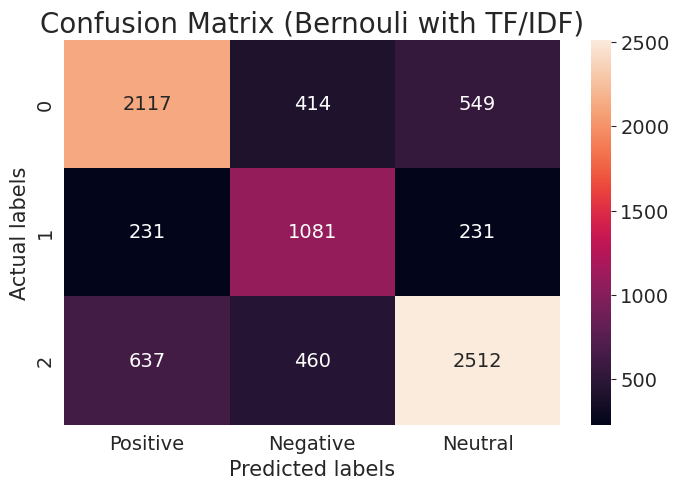

In [ ]:
cf4a= (confusion_matrix(y_test,y_pred3_bnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Bernoulli Navies Bayes was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-69%

Precision:-68%

Recall:- 70%

f1-score:-68%

# **MODEL - 4 (TF-IDF)** **KNN(K-Nearest Neighbours)**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
#predicted values
pred_knn_tv = knn_tv.predict(tv_X_test)

In [ ]:
pred_knn_tv

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
# Accuracy
accuracy_KNN_tv = accuracy_score(y_test,pred_knn_tv)
print("Accuracy :",(accuracy_KNN_tv))

Accuracy : 0.27648202137998057


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tv))

              precision    recall  f1-score   support

    Negative       0.82      0.12      0.22      3080
     Neutral       0.20      0.95      0.33      1543
    Positive       0.84      0.12      0.21      3609

    accuracy                           0.28      8232
   macro avg       0.62      0.40      0.25      8232
weighted avg       0.71      0.28      0.23      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

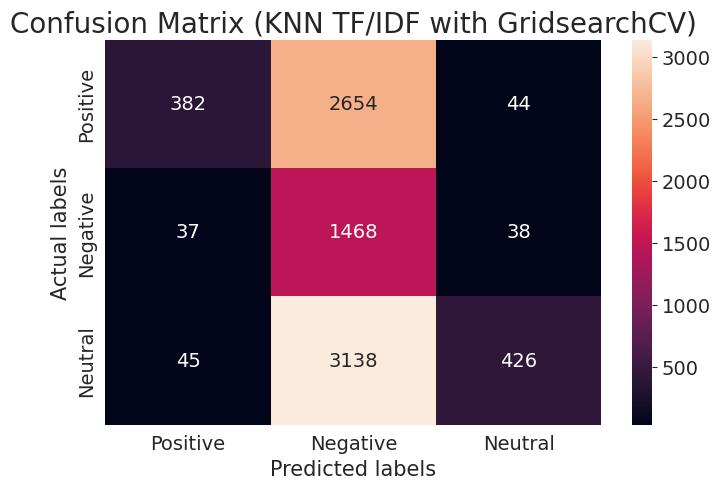

In [ ]:
cf4a= (confusion_matrix(y_test,pred_knn_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.

KNN(K-Nearest Neighbours)was used to classify the data, resulting in an accuracy of 27%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and worst model as compared to the all the baseline model.

2.Which hyperparameter optimization technique have you used and why?

Hyperparameters using cross-validation, In this case, the hyperparameter space is defined by the "param" dictionary, which specifies the number of neighbors to consider (n_neighbors) ranging from 1 to 8.

The reason for using GridSearchCV in this case is to find the optimal number of neighbors (n_neighbors) for the KNN classifier.

3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

No, as seen in above Evaluation metric Score Chart as follows and here accuracy is worst as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-27%

Precision:-62%

Recall:- 40%

f1-score:-25%

# **MODEL - 5 (TF-IDF)** **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_rf_tv = rf_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_tv_rf = (y_pred_rf_tv == y_test).mean()
print('Accuracy_tv_rf:', accuracy_tv_rf)

Accuracy_tv_rf: 0.7359086491739553


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf_tv))

              precision    recall  f1-score   support

    Negative       0.75      0.72      0.74      3080
     Neutral       0.65      0.64      0.64      1543
    Positive       0.76      0.79      0.77      3609

    accuracy                           0.74      8232
   macro avg       0.72      0.72      0.72      8232
weighted avg       0.74      0.74      0.74      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

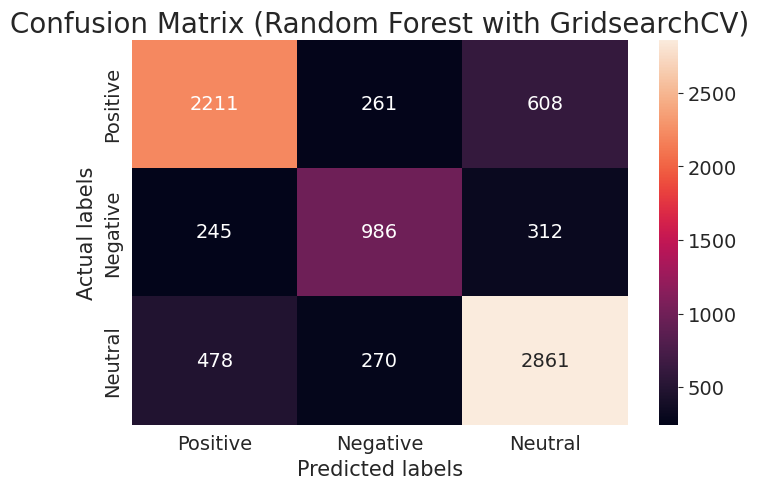

In [ ]:
cf5a= (confusion_matrix(y_test,y_pred_rf_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Random Forest was used to classify the data, resulting in an accuracy of 73%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.

2.Which hyperparameter optimization technique have you used and why?

The Random Forest Classifier has been initialized with some default values for the hyperparameters, including n_estimators=100 and random_state=42.In this case, the default values have been used to fit the model to the training data and predict the labels for the test data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-72%

Precision:-73%

Recall:- 73%

f1-score:-73%

# **MODEL - 6 (TF-IDF)** **Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_sgd_tv = sgd_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd_tv= accuracy_score(y_test, y_pred_sgd_tv)
print('Accuracy:', accuracy_sgd_tv)

Accuracy: 0.7648202137998056


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd_tv ))

              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78      3080
     Neutral       0.78      0.44      0.56      1543
    Positive       0.76      0.87      0.81      3609

    accuracy                           0.76      8232
   macro avg       0.77      0.70      0.72      8232
weighted avg       0.77      0.76      0.75      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

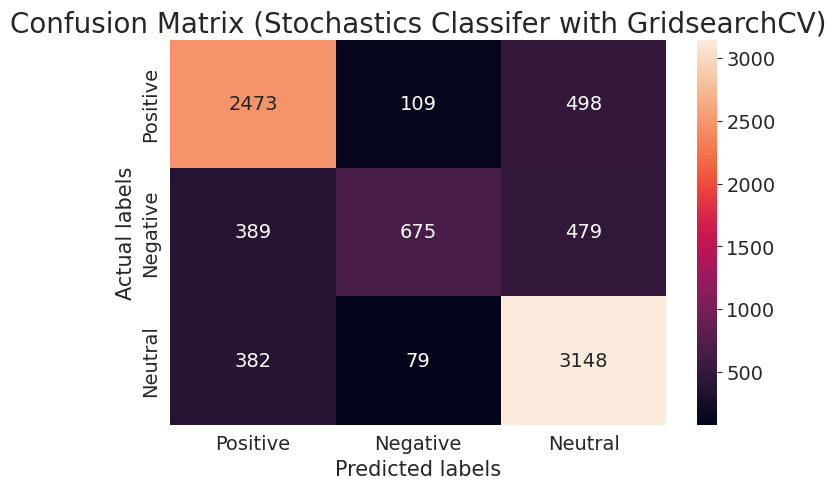

In [ ]:
cf6a= (confusion_matrix(y_test,y_pred_sgd_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Stochastics Classifer with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Stochastic Gradient Descent was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

The Stochastic Gradient Descent (SGD) Classifier has been initialized with some default values for the hyperparameters, including loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000. In this case, the default values have been used to fit the model to the training data and predict the labels for the test data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-72%

Precision:-77%

Recall:- 77%

f1-score:-76%

# **MODEL - 7 (TF-IDF)** **Support Vector Machine**

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(tv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(tv_X_test)

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7721088435374149


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.79      3080
     Neutral       0.73      0.54      0.62      1543
    Positive       0.79      0.85      0.82      3609

    accuracy                           0.77      8232
   macro avg       0.76      0.73      0.74      8232
weighted avg       0.77      0.77      0.77      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

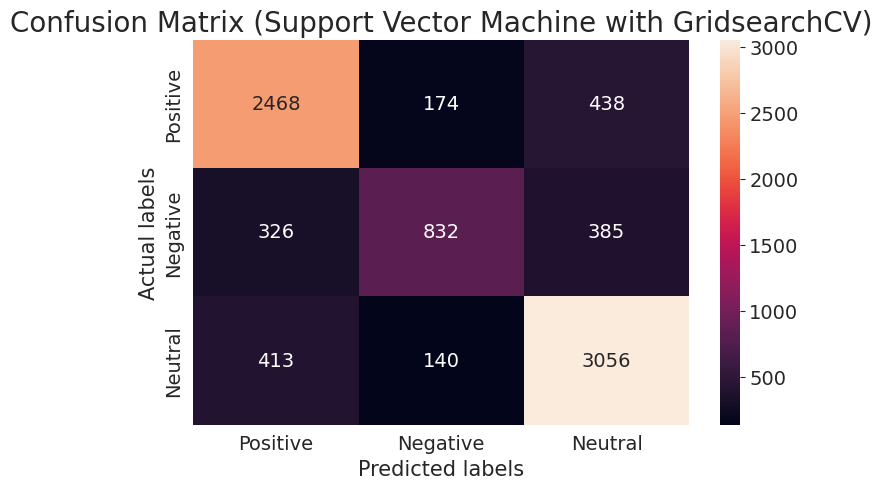

In [ ]:
cf7a= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Support Vector Machine with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**


Support Vector Machine was used to classify the data, resulting in an accuracy of 77%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-77%

Precision:-76%

Recall:- 73%

f1-score:-74%

# **Classfication Metrics Report**

Classification metrics are used to evaluate the performance of a classification model by comparing the predicted labels to the actual labels. **Accuracy can be useful in evaluating sentiment analysis models, particularly if the classes are balanced.**

Accuracy: The proportion of correctly predicted labels out of the total number of samples. It is computed as **(TP+TN)/(TP+TN+FP+FN)**

Where

**TP**:-True Positive

**TN**:-True Negative

**FP**:-False Positive

**FN**:-False Negative


In [ ]:
acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier','Multinomial Navies Bayes','Bernoulli Navies Bayes','Stochastic Gradient Descent','Random Forest'],
        'Count Vector':  [accuracy_lr_cv,np.mean(cv_score_dt_cv),accuracy_KNN,accuracy_svc,accuracy_bnb,accuracy_mnb,accuracy_sgd,accuracy_rf],
        'Tf/idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv),accuracy_KNN_tv,accuracy_svc,accuracy_mnb_tv,accuracy_bnb_tv,accuracy_sgd_tv,accuracy_tv_rf]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])
cv_score_table

Model  Count Vector  Tf/idf Vector
0  Logistic Regression with GridserachCV      0.787658       0.783285
1               Decision Tree Classifier      0.704389       0.624875
2        K-Nearest-Neighbours Classifier      0.392979       0.276482
3      Support-Vector-Machine Classifier      0.772109       0.772109
4               Multinomial Navies Bayes      0.693635       0.693635
5                 Bernoulli Navies Bayes      0.683673       0.693635
6            Stochastic Gradient Descent      0.799563       0.764820
7                          Random Forest      0.760811       0.735909

**1. Which ML model did you choose from the above created models as your final prediction model and why?**

Based on the metrics chart above, we can conclude that the **Stochastic Gradient Descent modelusing Count Vectorization**Technique performed better with an accuracy level of **80%**, compared to **Logistic Regression using Tf/idf Vectorization** which achieved an accuracy level of **78%**. Therefore, we have decided to deploy the **Stochastic Gradient Descent model** using Count Vectorization Technique.

**2.Explain the model which you have used and the feature importance using any model explainability tool?**

1-The model that we have used is the Stochastic Gradient Descent (SGD) classifier, which is a linear classifier that uses gradient descent optimization to update the model parameters.  The Count Vectorization Technique works by counting the occurrence of each word in the text data and then creating a document-term matrix where each row represents a document and each column represents a word in the vocabulary.

2-To understand the feature importance, we can use the Permutation Importance technique provided by the scikit-learn library. The Permutation Importance technique works by randomly permuting the values of a feature and observing the effect on the model's performance.

# **Conclusion**

1.We applied 8 models namely, Logistic Regression with Grid Search CV, Decision Tree Classifier,Stochastic Gradient Descent	, KNN, SVM,Multinomial Navies Bayes,Bernoulli Navies Bayes	Classifier for both Count Vector And TF ID Vectorization techniques.


2..We conclude that the machine is generating the best results for the **Stochastic Gradient Descent(count vectorizer)** model with an **Accuracy** of **80.43%** followed  by the **Logistic Regression with Grid Search CV (TF/ID vectorizer)** model with an **Accuracy** of **78.86%.**

3.In the future ,we can repeat the analysis and compare it with the present sentimental analysis to gauge the impact of the initiatives on the ground.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***